# Quantitative-Based Trading Strategies

Quantitative-based trading strategies leverage mathematical models, statistical analysis, and computational algorithms to identify trading opportunities and make informed decisions. These strategies rely heavily on data and advanced analytics to uncover patterns and predict future price movements. The primary advantage of quantitative trading is its ability to process large volumes of data quickly and make objective, data-driven decisions. Below are some of the key strategies employed in quantitative trading:

### Key Points:
- Relies on historical price relationships and statistical models.
- Involves pairs trading or basket trading.
- Requires high-frequency trading systems for quick execution.

### 1. Statistical Arbitrage
Statistical arbitrage, often referred to as "stat arb," involves exploiting price discrepancies between related financial instruments. This strategy typically involves pairs trading, where two correlated assets are traded simultaneously to capture the divergence and convergence in their prices. Traders use statistical models to identify temporary mispricings, such as deviations from historical price relationships. When the prices revert to their mean, the trader profits from the convergence.

Statistical arbitrage strategies utilize mathematical models, statistical analysis, and computational algorithms to identify and exploit price discrepancies in financial markets. These strategies aim to profit from temporary mispricings and market inefficiencies by leveraging sophisticated quantitative techniques. Traders employ a diverse array of strategies, including pairs trading, index arbitrage, market neutral strategies, volatility arbitrage, merger arbitrage, convertible arbitrage, event arbitrage, dividend arbitrage, statistical pattern recognition, high-frequency trading arbitrage, basket trading, ETF arbitrage, sector arbitrage, cross-asset arbitrage, calendar spread arbitrage, and quantitative value arbitrage. Each strategy harnesses unique aspects of statistical analysis and market behavior to create robust trading systems adaptable to various market conditions and risk preferences.

#### A. Pairs Trading
Pairs trading is a market-neutral trading strategy that involves identifying two historically correlated assets and exploiting the price divergence and convergence between them. The strategy assumes that the price relationship between the two assets will revert to the mean over time. When the price spread between the two assets widens beyond a certain threshold, the trader takes a long position in the underperforming asset and a short position in the outperforming asset, expecting the prices to converge.

#### Example
1. **Data Download and Cleaning**: The script downloads historical price data for AAPL and MSFT, then removes any rows with missing data.
2. **Cointegration Test**: It tests for cointegration between the two stock prices.
3. **Spread Calculation**: It calculates the spread between the two stocks and the z-score of the spread.
4. **Trading Signals**: It generates buy (long) and sell (short) signals based on the z-score thresholds.
5. **Plotting the Spread**: The spread is plotted with markers indicating the buy and sell signals.
6. **Plotting the Z-score**: The z-score is plotted along with the trading signals, showing the thresholds for buy and sell decisions.
7. **Trading Strategy**: The script implements a simple trading strategy based on the z-score and calculates the daily returns.
8. **Plotting Cumulative Returns**: It plots the cumulative returns of the strategy.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

P-value: 0.551295741390123
The stocks AAPL and MSFT are not cointegrated.


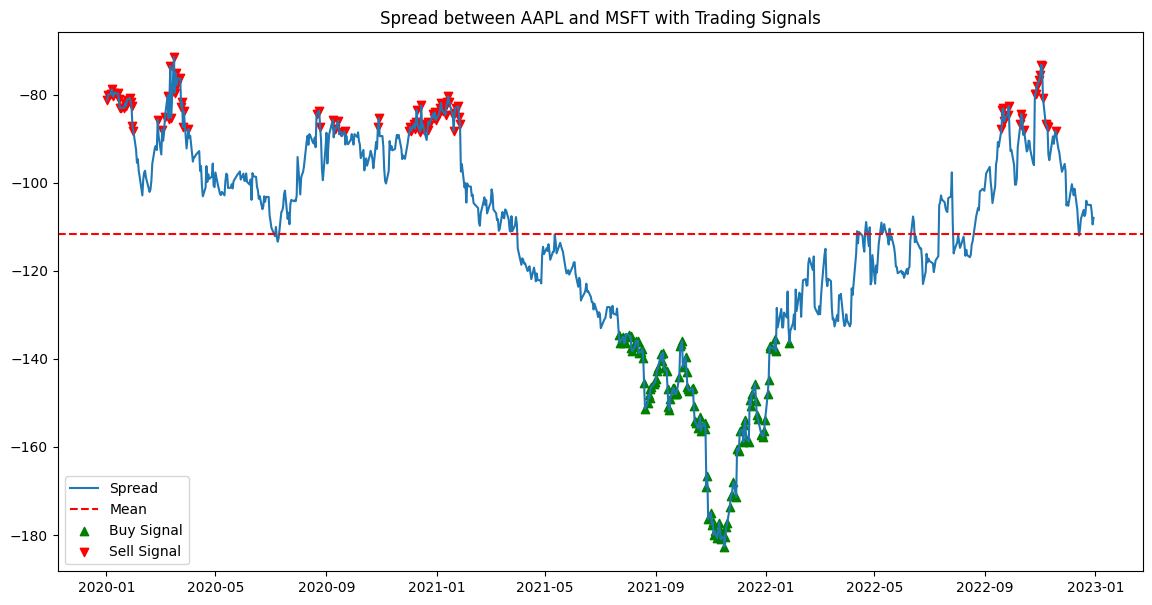

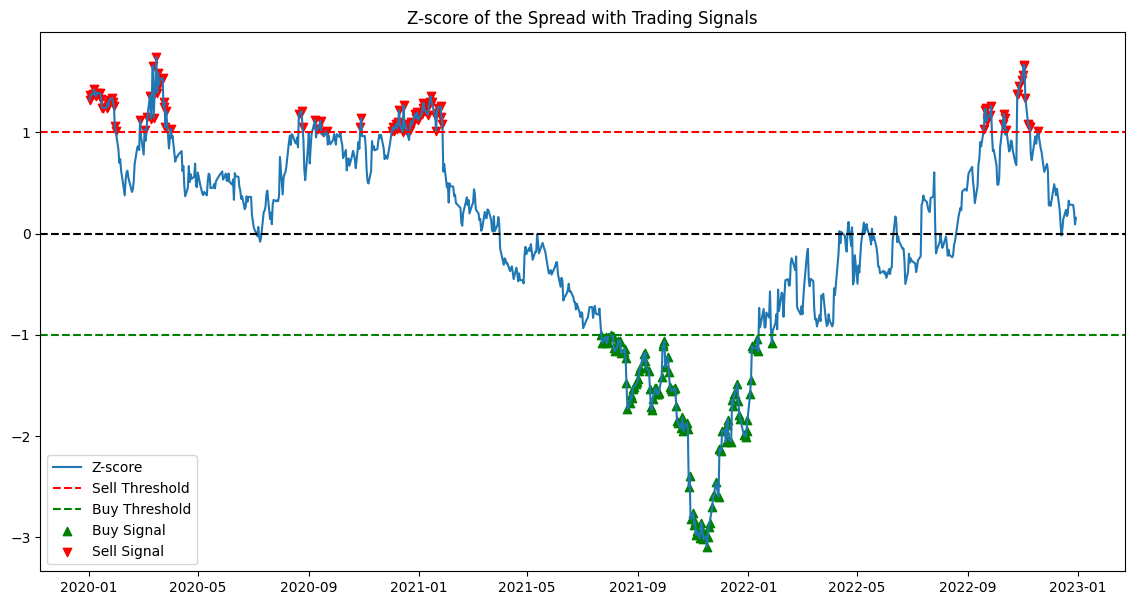

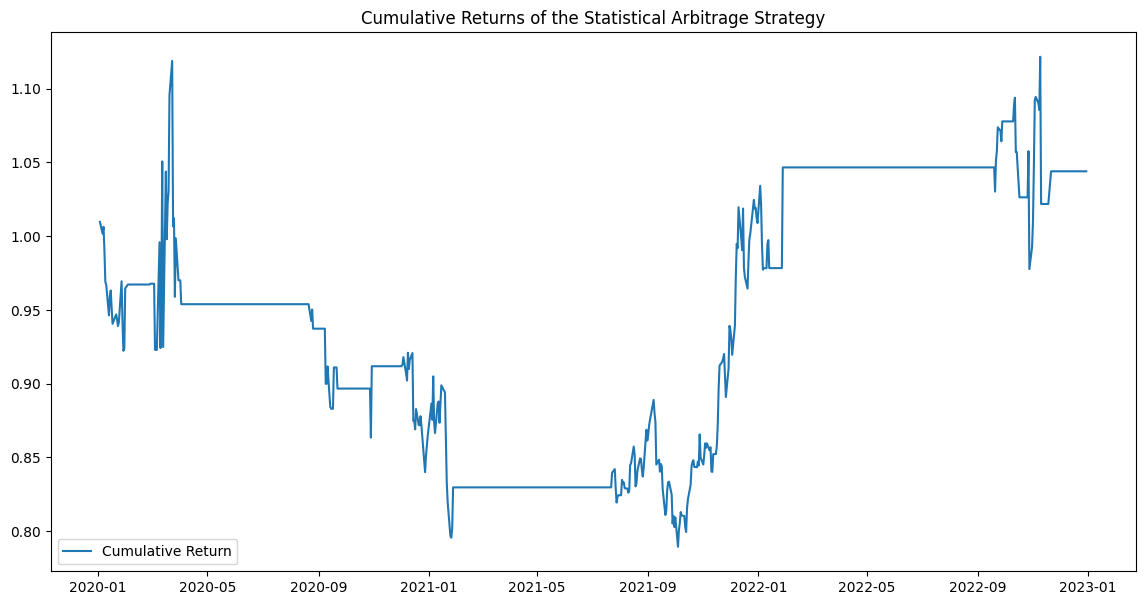

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint

# Download historical price data for two stocks
start_date = '2020-01-01'
end_date = '2023-01-01'
stock1 = 'AAPL'
stock2 = 'MSFT'

data1 = yf.download(stock1, start=start_date, end=end_date)['Adj Close']
data2 = yf.download(stock2, start=start_date, end=end_date)['Adj Close']

# Merge the data into a single DataFrame
data = pd.DataFrame({stock1: data1, stock2: data2}).dropna()

# Check for cointegration
score, pvalue, _ = coint(data[stock1], data[stock2])
print(f'P-value: {pvalue}')

# If p-value is below a threshold (e.g., 0.05), the series are cointegrated
if pvalue < 0.05:
    print(f'The stocks {stock1} and {stock2} are cointegrated.')
else:
    print(f'The stocks {stock1} and {stock2} are not cointegrated.')

# Calculate the spread
data['Spread'] = data[stock1] - data[stock2]

# Calculate the z-score of the spread
data['Z-score'] = (data['Spread'] - data['Spread'].mean()) / data['Spread'].std()

# Define the trading signals
data['Long'] = np.where(data['Z-score'] < -1, 1, 0)
data['Short'] = np.where(data['Z-score'] > 1, -1, 0)
data['Positions'] = data['Long'] + data['Short']

# Plot the spread with trading signals
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Spread'], label='Spread')
plt.axhline(data['Spread'].mean(), color='red', linestyle='--', label='Mean')
plt.scatter(data.index[data['Long'] == 1], data['Spread'][data['Long'] == 1], marker='^', color='green', label='Buy Signal')
plt.scatter(data.index[data['Short'] == -1], data['Spread'][data['Short'] == -1], marker='v', color='red', label='Sell Signal')
plt.title('Spread between AAPL and MSFT with Trading Signals')
plt.legend()
plt.show()

# Plot the z-score with trading signals
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Z-score'], label='Z-score')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(1, color='red', linestyle='--', label='Sell Threshold')
plt.axhline(-1, color='green', linestyle='--', label='Buy Threshold')
plt.scatter(data.index[data['Long'] == 1], data['Z-score'][data['Long'] == 1], marker='^', color='green', label='Buy Signal')
plt.scatter(data.index[data['Short'] == -1], data['Z-score'][data['Short'] == -1], marker='v', color='red', label='Sell Signal')
plt.title('Z-score of the Spread with Trading Signals')
plt.legend()
plt.show()

# Implement a simple trading strategy based on the z-score
data['Position'] = np.where(data['Z-score'] > 1, -1, np.where(data['Z-score'] < -1, 1, 0))

# Calculate the daily returns
data['Return'] = data[stock1].pct_change() * data['Position'].shift()

# Plot cumulative returns
data['Cumulative Return'] = (1 + data['Return']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the Statistical Arbitrage Strategy')
plt.legend()
plt.show()


#### B. Index Arbitrage

Index arbitrage involves exploiting price differences between an index and its constituent stocks. The strategy often involves buying index futures and selling the underlying basket of stocks when there is a price discrepancy, or vice versa. This arbitrage opportunity arises when the futures price deviates from its fair value, which is derived from the current spot price of the index and the cost of carry.

#### Example 
1. **Data Download**: The script downloads historical price data for the S&P 500 index and its constituent stocks.
2. **Index Fair Value Calculation**: It calculates the fair value of the index as the weighted average of its constituent stocks.
3. **Spread Calculation**: The spread between the actual index price and its fair value is calculated.
4. **Z-score Calculation**: The z-score of the spread is calculated to standardize the spread values.
5. **Trading Signals**: Buy (long) and sell (short) signals are generated based on the z-score thresholds.
6. **Plotting the Spread**: The spread is plotted with markers indicating the buy and sell signals.
7. **Plotting the Z-score**: The z-score is plotted along with the trading signals, showing the thresholds for buy and sell decisions.
8. **Trading Strategy**: A simple trading strategy is implemented based on the z-score, and the daily returns are calculated.
9. **Plotting Cumulative Returns**: The cumulative returns of the strategy are plotted.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  4 of 5 completed

1 Failed download:
['FB']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  4 of 5 completed

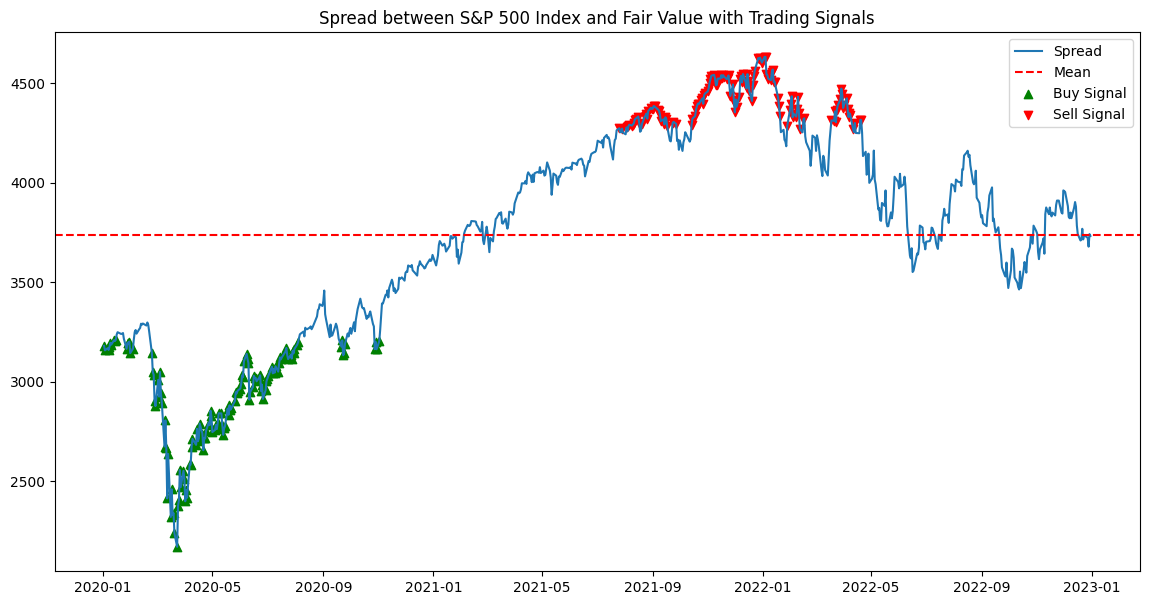

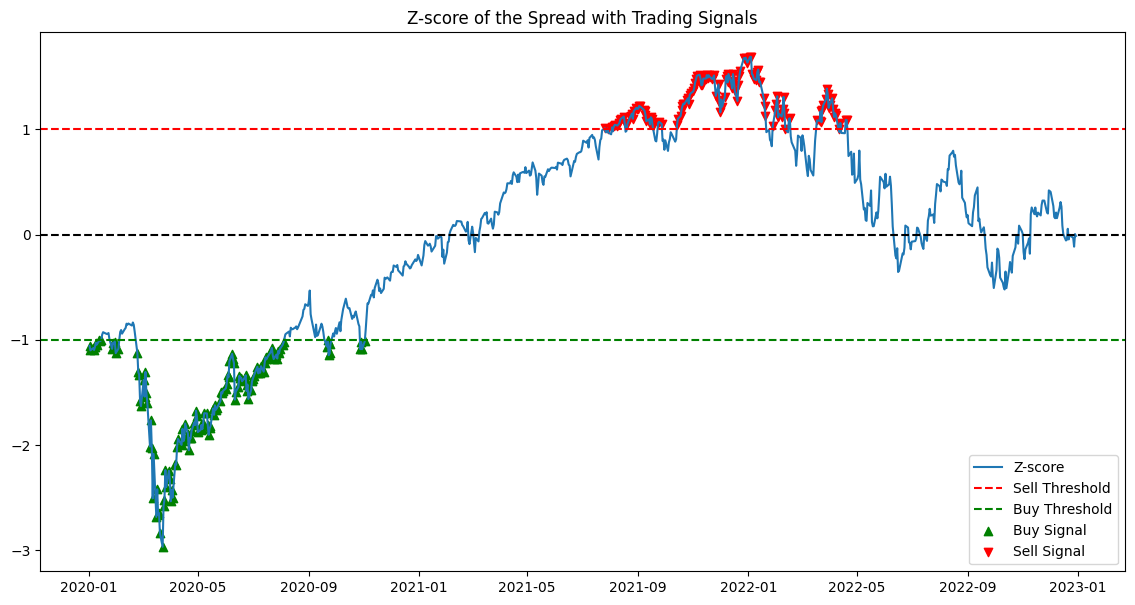

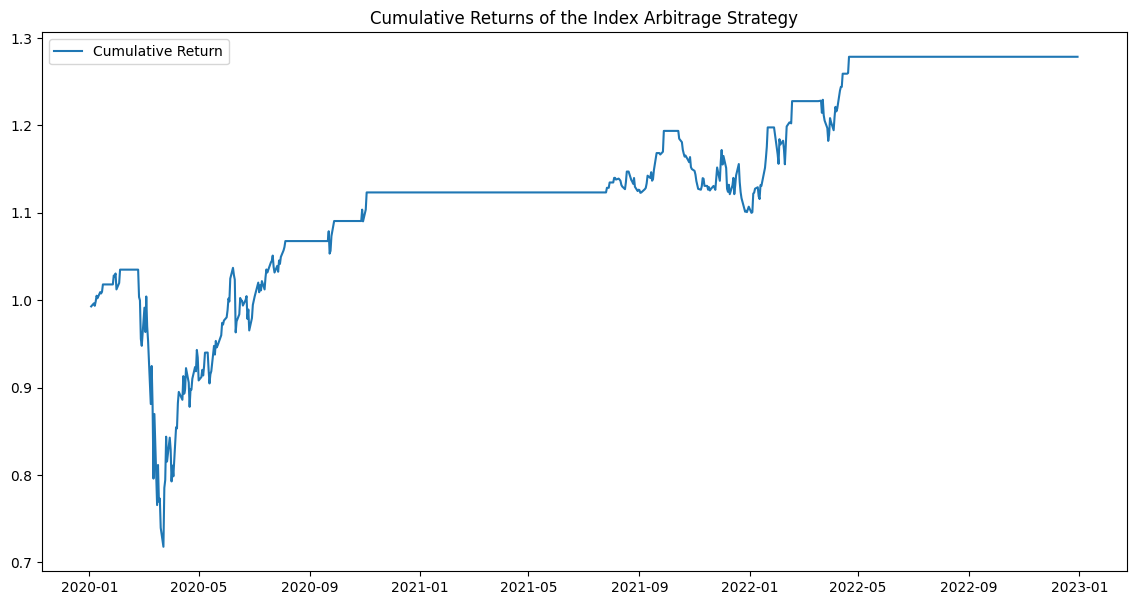

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the index and its constituent stocks
index = '^GSPC'  # S&P 500 Index
constituents = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'FB']  # Example constituent stocks

# Download historical price data
start_date = '2020-01-01'
end_date = '2023-01-01'

# Download index data
index_data = yf.download(index, start=start_date, end=end_date)['Adj Close']

# Download constituents data
constituents_data = yf.download(constituents, start=start_date, end=end_date)['Adj Close']

# Calculate the index fair value as the weighted average of constituents
weights = [0.2, 0.2, 0.2, 0.2, 0.2]  # Example equal weights for simplicity
fair_value = (constituents_data * weights).sum(axis=1)

# Merge the index data and fair value into a single DataFrame
data = pd.DataFrame({index: index_data, 'Fair Value': fair_value}).dropna()

# Calculate the spread
data['Spread'] = data[index] - data['Fair Value']

# Calculate the z-score of the spread
data['Z-score'] = (data['Spread'] - data['Spread'].mean()) / data['Spread'].std()

# Define the trading signals
data['Long'] = np.where(data['Z-score'] < -1, 1, 0)
data['Short'] = np.where(data['Z-score'] > 1, -1, 0)
data['Positions'] = data['Long'] + data['Short']

# Plot the spread with trading signals
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Spread'], label='Spread')
plt.axhline(data['Spread'].mean(), color='red', linestyle='--', label='Mean')
plt.scatter(data.index[data['Long'] == 1], data['Spread'][data['Long'] == 1], marker='^', color='green', label='Buy Signal')
plt.scatter(data.index[data['Short'] == -1], data['Spread'][data['Short'] == -1], marker='v', color='red', label='Sell Signal')
plt.title('Spread between S&P 500 Index and Fair Value with Trading Signals')
plt.legend()
plt.show()

# Plot the z-score with trading signals
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Z-score'], label='Z-score')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(1, color='red', linestyle='--', label='Sell Threshold')
plt.axhline(-1, color='green', linestyle='--', label='Buy Threshold')
plt.scatter(data.index[data['Long'] == 1], data['Z-score'][data['Long'] == 1], marker='^', color='green', label='Buy Signal')
plt.scatter(data.index[data['Short'] == -1], data['Z-score'][data['Short'] == -1], marker='v', color='red', label='Sell Signal')
plt.title('Z-score of the Spread with Trading Signals')
plt.legend()
plt.show()

# Implement a simple trading strategy based on the z-score
data['Position'] = np.where(data['Z-score'] > 1, -1, np.where(data['Z-score'] < -1, 1, 0))

# Calculate the daily returns
data['Return'] = data[index].pct_change() * data['Position'].shift()

# Plot cumulative returns
data['Cumulative Return'] = (1 + data['Return']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the Index Arbitrage Strategy')
plt.legend()
plt.show()

#### C. Market Neutral Strategy

A market-neutral strategy aims to achieve returns that are independent of market movements by balancing long and short positions. The objective is to hedge market risk by maintaining an equal value of long and short positions, ideally making the portfolio immune to broader market trends. This strategy profits from the relative performance of the chosen assets.

#### Example
    
1. **Data Download and Cleaning**: The script downloads historical price data for two stocks (AAPL for long and MSFT for short) and removes any rows with missing data.
2. **Cointegration Test**: It tests for cointegration between the two stock prices.
3. **Spread Calculation**: The spread between the long and short stock prices is calculated.
4. **Z-score Calculation**: The z-score of the spread is calculated to standardize the spread values.
5. **Trading Signals**: Buy (long) and sell (short) signals are generated based on the z-score thresholds.
6. **Plotting the Spread**: The spread is plotted with markers indicating the buy and sell signals.
7. **Plotting the Z-score**: The z-score is plotted along with the trading signals, showing the thresholds for buy and sell decisions.
8. **Trading Strategy**: A simple market-neutral strategy is implemented based on the z-score. The returns of the long and short positions are calculated.
9. **Market Neutral Returns**: The script calculates the combined market-neutral returns and plots the cumulative returns of the strategy.




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

P-value: 0.551295741390123
The stocks AAPL and MSFT are not cointegrated.


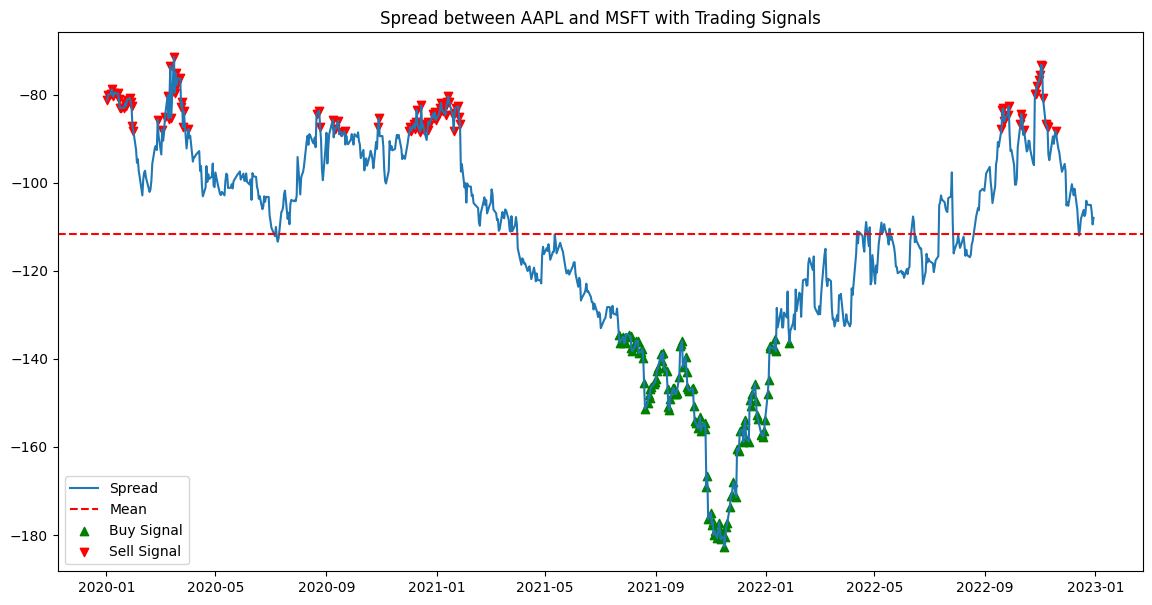

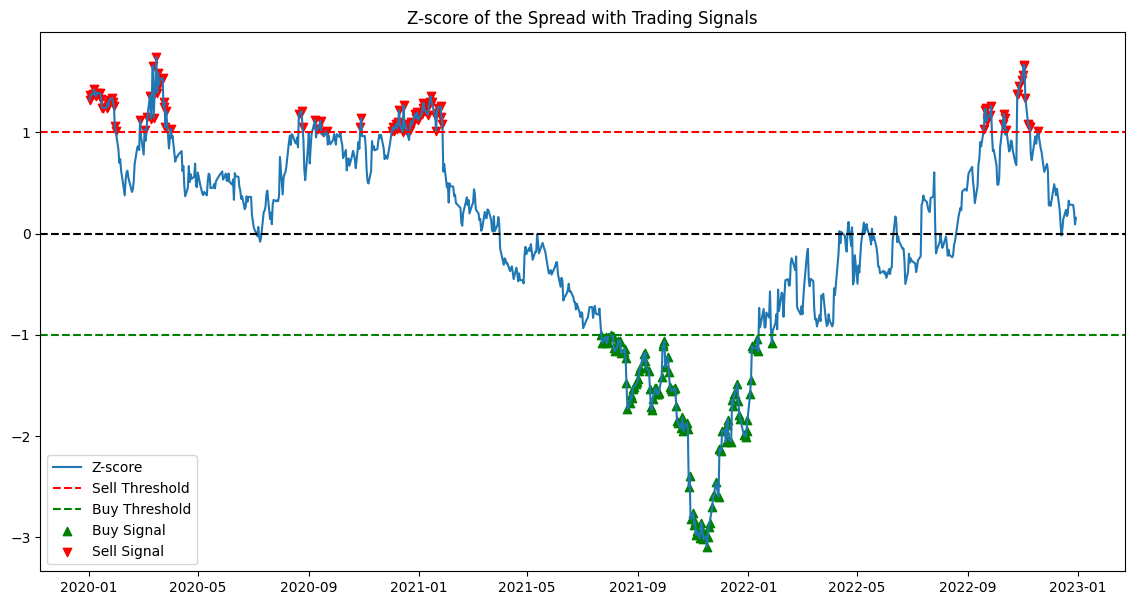

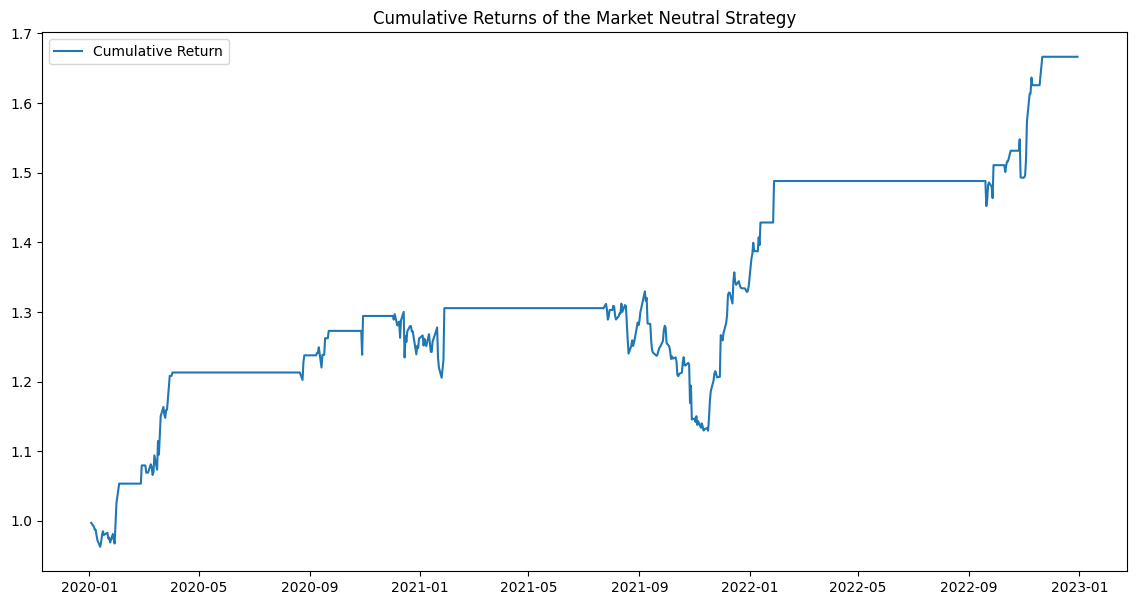

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint

# Define the stocks for the strategy
stock_long = 'AAPL'
stock_short = 'MSFT'

# Download historical price data
start_date = '2020-01-01'
end_date = '2023-01-01'

data_long = yf.download(stock_long, start=start_date, end=end_date)['Adj Close']
data_short = yf.download(stock_short, start=start_date, end=end_date)['Adj Close']

# Merge the data into a single DataFrame
data = pd.DataFrame({stock_long: data_long, stock_short: data_short}).dropna()

# Check for cointegration
score, pvalue, _ = coint(data[stock_long], data[stock_short])
print(f'P-value: {pvalue}')

# If p-value is below a threshold (e.g., 0.05), the series are cointegrated
if pvalue < 0.05:
    print(f'The stocks {stock_long} and {stock_short} are cointegrated.')
else:
    print(f'The stocks {stock_long} and {stock_short} are not cointegrated.')

# Calculate the spread
data['Spread'] = data[stock_long] - data[stock_short]

# Calculate the z-score of the spread
data['Z-score'] = (data['Spread'] - data['Spread'].mean()) / data['Spread'].std()

# Define the trading signals
data['Long'] = np.where(data['Z-score'] < -1, 1, 0)
data['Short'] = np.where(data['Z-score'] > 1, -1, 0)
data['Positions'] = data['Long'] + data['Short']

# Plot the spread with trading signals
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Spread'], label='Spread')
plt.axhline(data['Spread'].mean(), color='red', linestyle='--', label='Mean')
plt.scatter(data.index[data['Long'] == 1], data['Spread'][data['Long'] == 1], marker='^', color='green', label='Buy Signal')
plt.scatter(data.index[data['Short'] == -1], data['Spread'][data['Short'] == -1], marker='v', color='red', label='Sell Signal')
plt.title(f'Spread between {stock_long} and {stock_short} with Trading Signals')
plt.legend()
plt.show()

# Plot the z-score with trading signals
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Z-score'], label='Z-score')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(1, color='red', linestyle='--', label='Sell Threshold')
plt.axhline(-1, color='green', linestyle='--', label='Buy Threshold')
plt.scatter(data.index[data['Long'] == 1], data['Z-score'][data['Long'] == 1], marker='^', color='green', label='Buy Signal')
plt.scatter(data.index[data['Short'] == -1], data['Z-score'][data['Short'] == -1], marker='v', color='red', label='Sell Signal')
plt.title('Z-score of the Spread with Trading Signals')
plt.legend()
plt.show()

# Implement a simple market-neutral strategy based on the z-score
data['Position'] = np.where(data['Z-score'] > 1, -1, np.where(data['Z-score'] < -1, 1, 0))

# Calculate the returns of the long and short positions
data['Long Return'] = data[stock_long].pct_change() * data['Position'].shift()
data['Short Return'] = -data[stock_short].pct_change() * data['Position'].shift()

# Calculate the market neutral returns
data['Market Neutral Return'] = data['Long Return'] + data['Short Return']

# Plot cumulative returns
data['Cumulative Return'] = (1 + data['Market Neutral Return']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the Market Neutral Strategy')
plt.legend()
plt.show()

#### D.Volatility Arbitrage

Volatility arbitrage exploits the difference between implied volatility and realized volatility. The strategy involves taking positions in options and/or other derivative instruments to profit from these discrepancies. Implied volatility is the market's forecast of a likely movement in a security's price, while realized volatility is the actual movement of the security's price over a given period.

#### Example

1. **Data Download and Cleaning**: The script downloads historical price data for AAPL and VIX using `yfinance`. It ensures there are no missing values and the DataFrame is properly formatted.
2. **Realized Volatility Calculation**: The script calculates the realized (historical) volatility of the stock using log returns.
3. **Volatility Spread Calculation**: It calculates the spread between implied and realized volatility.
4. **Trading Signals**: Buy (long) and sell (short) signals are generated based on the volatility spread thresholds.
5. **Plotting the Volatility Spread**: The spread is plotted with markers indicating the buy and sell signals.
6. **Plotting Realized and Implied Volatility**: Both realized and implied volatility are plotted along with the trading signals.
7. **Trading Strategy**: A simple volatility arbitrage strategy is implemented based on the volatility spread, and the returns are calculated.
8. **Cumulative Returns**: The script calculates and plots the cumulative returns of the strategy.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


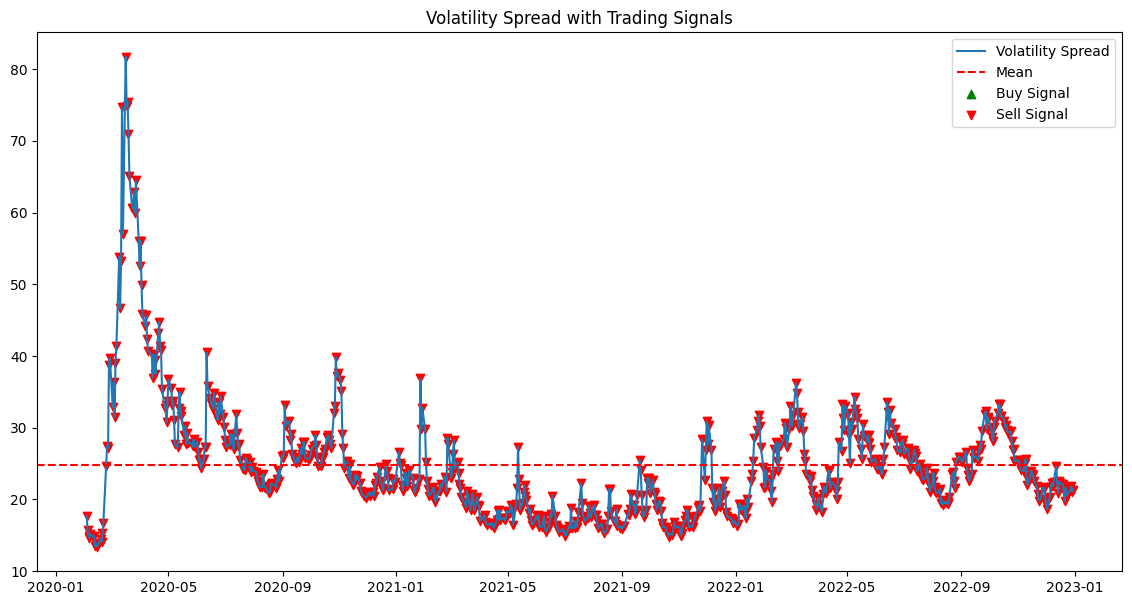

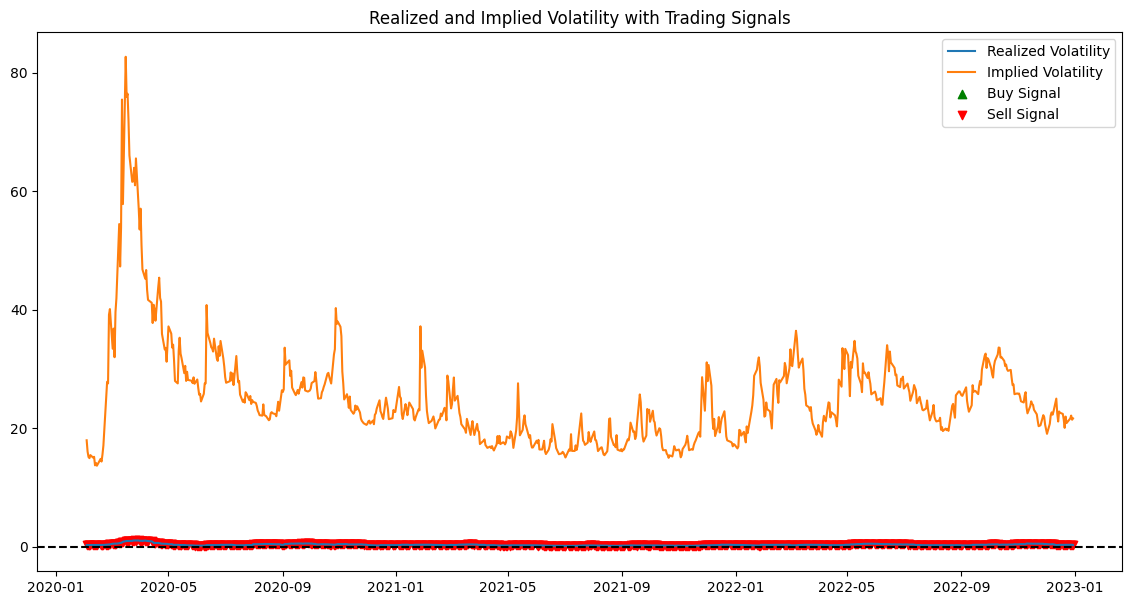

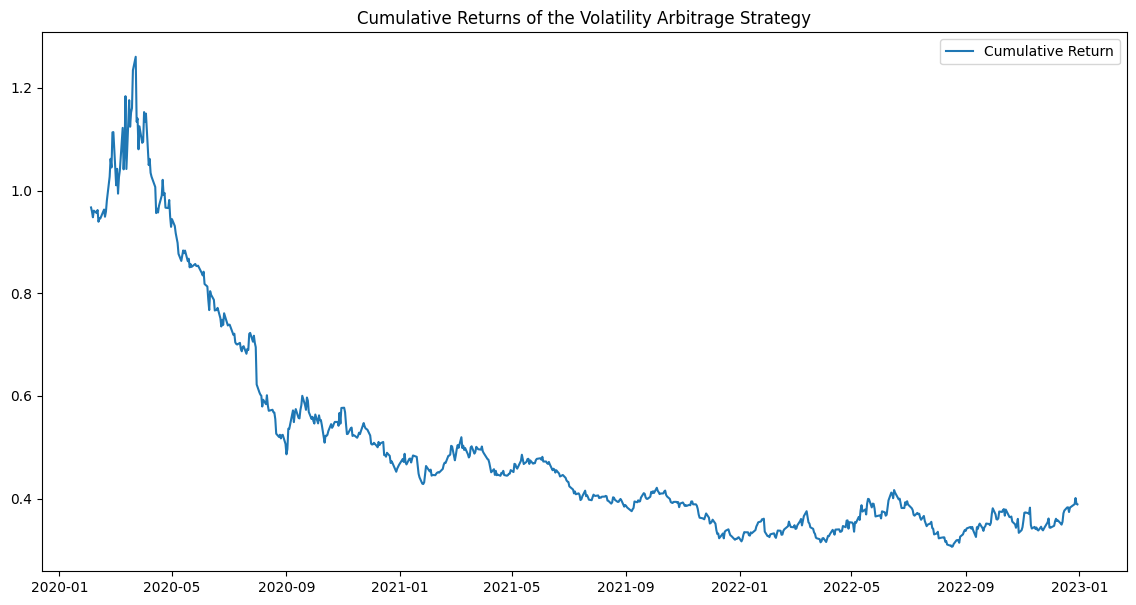

In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the stock and the corresponding options
stock = 'AAPL'

# Download historical price data
start_date = '2020-01-01'
end_date = '2023-01-01'
data = yf.download(stock, start=start_date, end=end_date)['Adj Close']

# Calculate realized volatility (historical volatility)
data = data.dropna()
data = data.to_frame()  # Ensure 'data' is a DataFrame
data['Log Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
data['Realized Volatility'] = data['Log Returns'].rolling(window=21).std() * np.sqrt(252)

# Download implied volatility data using yfinance
vix = yf.download('^VIX', start=start_date, end=end_date)['Adj Close']

# Merge the data into a single DataFrame
vol_data = pd.DataFrame({'Realized Volatility': data['Realized Volatility'], 'Implied Volatility': vix}).dropna()

# Calculate the volatility spread
vol_data['Volatility Spread'] = vol_data['Implied Volatility'] - vol_data['Realized Volatility']

# Define the trading signals
vol_data['Long'] = np.where(vol_data['Volatility Spread'] < -2, 1, 0)
vol_data['Short'] = np.where(vol_data['Volatility Spread'] > 2, -1, 0)
vol_data['Positions'] = vol_data['Long'] + vol_data['Short']

# Plot the volatility spread with trading signals
plt.figure(figsize=(14, 7))
plt.plot(vol_data.index, vol_data['Volatility Spread'], label='Volatility Spread')
plt.axhline(vol_data['Volatility Spread'].mean(), color='red', linestyle='--', label='Mean')
plt.scatter(vol_data.index[vol_data['Long'] == 1], vol_data['Volatility Spread'][vol_data['Long'] == 1], marker='^', color='green', label='Buy Signal')
plt.scatter(vol_data.index[vol_data['Short'] == -1], vol_data['Volatility Spread'][vol_data['Short'] == -1], marker='v', color='red', label='Sell Signal')
plt.title(f'Volatility Spread with Trading Signals')
plt.legend()
plt.show()

# Plot the realized and implied volatility with trading signals
plt.figure(figsize=(14, 7))
plt.plot(vol_data.index, vol_data['Realized Volatility'], label='Realized Volatility')
plt.plot(vol_data.index, vol_data['Implied Volatility'], label='Implied Volatility')
plt.axhline(0, color='black', linestyle='--')
plt.scatter(vol_data.index[vol_data['Long'] == 1], vol_data['Realized Volatility'][vol_data['Long'] == 1], marker='^', color='green', label='Buy Signal')
plt.scatter(vol_data.index[vol_data['Short'] == -1], vol_data['Realized Volatility'][vol_data['Short'] == -1], marker='v', color='red', label='Sell Signal')
plt.title('Realized and Implied Volatility with Trading Signals')
plt.legend()
plt.show()

# Implement a simple volatility arbitrage strategy based on the volatility spread
vol_data['Position'] = np.where(vol_data['Volatility Spread'] > 2, -1, np.where(vol_data['Volatility Spread'] < -2, 1, 0))

# Calculate the returns of the strategy
data['Market Return'] = data['Adj Close'].pct_change()
vol_data = vol_data.join(data['Market Return'])
vol_data['Strategy Return'] = vol_data['Market Return'] * vol_data['Position'].shift()

# Plot cumulative returns
vol_data['Cumulative Return'] = (1 + vol_data['Strategy Return']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(vol_data.index, vol_data['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the Volatility Arbitrage Strategy')
plt.legend()
plt.show()


#### E. Merger Arbitrage

Merger arbitrage profits from price discrepancies before and after mergers and acquisitions. Typically, this involves buying the stock of the company being acquired and shorting the stock of the acquiring company.

####  Example of Merger Arbitrage


```python
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the stocks involved in the merger
target = 'TWTR'  # Example: Twitter Inc.
acquirer = 'MSFT'  # Example: Microsoft Corp.

# Download historical price data
start_date = '2020-01-01'
end_date = '2023-01-01'

target_data = yf.download(target, start=start_date, end=end_date)['Adj Close']
acquirer_data = yf.download(acquirer, start=start_date, end=end_date)['Adj Close']

# Merge the data into a single DataFrame
data = pd.DataFrame({target: target_data, acquirer: acquirer_data}).dropna()

# Calculate the spread
data['Spread'] = data[target] - data[acquirer]

# Calculate the z-score of the spread
data['Z-score'] = (data['Spread'] - data['Spread'].mean()) / data['Spread'].std()

# Define the trading signals
data['Long'] = np.where(data['Z-score'] < -1, 1, 0)
data['Short'] = np.where(data['Z-score'] > 1, -1, 0)
data['Positions'] = data['Long'] + data['Short']

# Plot the spread with trading signals
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Spread'], label='Spread')
plt.axhline(data['Spread'].mean(), color='red', linestyle='--', label='Mean')
plt.scatter(data.index[data['Long'] == 1], data['Spread'][data['Long'] == 1], marker='^', color='green', label='Buy Signal')
plt.scatter(data.index[data['Short'] == -1], data['Spread'][data['Short'] == -1], marker='v', color='red', label='Sell Signal')
plt.title(f'Spread between {target} and {acquirer} with Trading Signals')
plt.legend()
plt.show()

# Implement a simple merger arbitrage strategy based on the z-score
data['Position'] = np.where(data['Z-score'] > 1, -1, np.where(data['Z-score'] < -1, 1, 0))

# Calculate the returns of the long and short positions
data['Long Return'] = data[target].pct_change() * data['Position'].shift()
data['Short Return'] = -data[acquirer].pct_change() * data['Position'].shift()

# Calculate the merger arbitrage returns
data['Merger Arbitrage Return'] = data['Long Return'] + data['Short Return']

# Plot cumulative returns
data['Cumulative Return'] = (1 + data['Merger Arbitrage Return']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the Merger Arbitrage Strategy')
plt.legend()
plt.show()
```

#### F. Convertible Arbitrage

Convertible arbitrage profits from price differences between convertible bonds and the underlying stocks. Typically, this involves buying undervalued convertible bonds while shorting the corresponding stocks.

#### Python Example of Convertible Arbitrage


```python
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the stock and the corresponding convertible bond
stock = 'AAPL'  # Example: Apple Inc.
bond = 'AAPL-Convertible'  # Example: Apple Inc. Convertible Bond (Symbol placeholder)

# Download historical price data
start_date = '2020-01-01'
end_date = '2023-01-01'

stock_data = yf.download(stock, start=start_date, end=end_date)['Adj Close']
# For simplicity, using stock data in place of bond data, replace with actual bond data
bond_data = yf.download(stock, start=start_date, end=end_date)['Adj Close'] * 0.95  # Simulated bond prices

# Merge the data into a single DataFrame
data = pd.DataFrame({stock: stock_data, bond: bond_data}).dropna()

# Calculate the spread
data['Spread'] = data[stock] - data[bond]

# Calculate the z-score of the spread
data['Z-score'] = (data['Spread'] - data['Spread'].mean()) / data['Spread'].std()

# Define the trading signals
data['Long'] = np.where(data['Z-score'] < -1, 1, 0)
data['Short'] = np.where(data['Z-score'] > 1, -1, 0)
data['Positions'] = data['Long'] + data['Short']

# Plot the spread with trading signals
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Spread'], label='Spread')
plt.axhline(data['Spread'].mean(), color='red', linestyle='--', label='Mean')
plt.scatter(data.index[data['Long'] == 1], data['Spread'][data['Long'] == 1], marker='^', color='green', label='Buy Signal')
plt.scatter(data.index[data['Short'] == -1], data['Spread'][data['Short'] == -1], marker='v', color='red', label='Sell Signal')
plt.title(f'Spread between {stock} and {bond} with Trading Signals')
plt.legend()
plt.show()

# Implement a simple convertible arbitrage strategy based on the z-score
data['Position'] = np.where(data['Z-score'] > 1, -1, np.where(data['Z-score'] < -1, 1, 0))

# Calculate the returns of the long and short positions
data['Long Return'] = data[bond].pct_change() * data['Position'].shift()
data['Short Return'] = -data[stock].pct_change() * data['Position'].shift()

# Calculate the convertible arbitrage returns
data['Convertible Arbitrage Return'] = data['Long Return'] + data['Short Return']

# Plot cumulative returns
data['Cumulative Return'] = (1 + data['Convertible Arbitrage Return']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the Convertible Arbitrage Strategy')
plt.legend()
plt.show()
```

#### G. Event Arbitrage

Event arbitrage profits from price movements triggered by specific events such as earnings announcements, mergers, or economic reports.

#### Python Example of Event Arbitrage


```python
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the stock and the event date (e.g., earnings announcement)
stock = 'AAPL'
event_date = '2022-01-27'  # Example event date

# Download historical price data
start_date = '2020-01-01'
end_date = '2023-01-01'
data = yf.download(stock, start=start_date, end=end_date)['Adj Close']

# Calculate the returns before and after the event
data['Return'] = data.pct_change()
event_index = data.index.get_loc(event_date)

# Calculate the cumulative returns
data['Cumulative Return'] = (1 + data['Return']).cumprod()

# Plot the cumulative returns with the event highlighted
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Cumulative Return'], label='Cumulative Return')
plt.axvline(event_date, color='red', linestyle='--', label='Event Date')
plt.title(f'Cumulative Returns of {stock} around Event')
plt.legend()
plt.show()

# Implement a simple event arbitrage strategy
# Buy 5 days before the event and sell 5 days after the event
pre_event_window = 5
post_event_window = 5

data['Position'] = 0
data.loc[data.index[event_index - pre_event_window:event_index + post_event_window], 'Position'] = 1

# Calculate the strategy returns
data['Strategy Return'] = data['Return'] * data['Position'].shift()

# Plot cumulative returns of the strategy
data['Strategy Cumulative Return'] = (1 + data['Strategy Return']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Strategy Cumulative Return'], label='Strategy Cumulative Return')
plt.title('Cumulative Returns of the Event Arbitrage Strategy')
plt.legend()
plt.show()
```

#### H. Dividend Arbitrage

Dividend arbitrage profits from the mispricing of dividend-paying stocks by capturing the dividend payout through strategic stock transactions.

#### Python Example of Dividend Arbitrage


```python
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the stock and dividend dates
stock = '

AAPL'

# Download historical price data
start_date = '2020-01-01'
end_date = '2023-01-01'
data = yf.download(stock, start=start_date, end=end_date)['Adj Close']

# Define the dividend dates and amounts (example data)
dividend_dates = ['2022-01-27', '2022-04-27', '2022-07-27', '2022-10-27']
dividend_amounts = [0.22, 0.22, 0.22, 0.22]

# Create a DataFrame for dividend information
dividends = pd.DataFrame({'Date': pd.to_datetime(dividend_dates), 'Dividend': dividend_amounts}).set_index('Date')

# Merge the price data and dividend information
data = data.to_frame().join(dividends, how='left').fillna(0)

# Implement a simple dividend arbitrage strategy
# Buy 1 day before the ex-dividend date and sell 1 day after
data['Position'] = 0
data['Position'] = np.where(data['Dividend'] > 0, 1, 0)

# Calculate the returns
data['Return'] = data['Adj Close'].pct_change()
data['Strategy Return'] = data['Return'] * data['Position'].shift()

# Plot cumulative returns of the strategy
data['Cumulative Return'] = (1 + data['Strategy Return']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the Dividend Arbitrage Strategy')
plt.legend()
plt.show()
```

#### I. Statistical Pattern Recognition

Statistical pattern recognition uses statistical techniques to identify and exploit recurring price patterns.

### Python Example of Statistical Pattern Recognition


```python
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the stock and the pattern to recognize (e.g., moving average crossover)
stock = 'AAPL'

# Download historical price data
start_date = '2020-01-01'
end_date = '2023-01-01'
data = yf.download(stock, start=start_date, end=end_date)['Adj Close']

# Calculate moving averages
data['SMA50'] = data.rolling(window=50).mean()
data['SMA200'] = data.rolling(window=200).mean()

# Identify moving average crossovers
data['Position'] = 0
data['Position'] = np.where(data['SMA50'] > data['SMA200'], 1, -1)

# Calculate the returns of the strategy
data['Return'] = data.pct_change()
data['Strategy Return'] = data['Return'] * data['Position'].shift()

# Plot cumulative returns of the strategy
data['Cumulative Return'] = (1 + data['Strategy Return']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the Statistical Pattern Recognition Strategy')
plt.legend()
plt.show()
```

#### J. High-Frequency Trading (HFT) Arbitrage

HFT arbitrage uses high-speed trading systems to exploit small price discrepancies that exist for very short periods.

#### Python Example of High-Frequency Trading (HFT) Arbitrage

High-frequency trading requires specialized infrastructure and low-latency data feeds, which are difficult to simulate in a simple script. However, here's a basic outline of how you might approach a high-frequency trading strategy:

```python
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Define the stock
stock = 'AAPL'

# Download historical intraday price data
start_date = '2022-01-01'
end_date = '2022-01-05'
data = yf.download(stock, start=start_date, end=end_date, interval='1m')['Adj Close']

# Simulate a simple HFT arbitrage strategy
# Buy when the price decreases by more than 0.1% within a minute, sell when it increases by more than 0.1%
data['Return'] = data.pct_change()
data['Position'] = 0
data['Position'] = np.where(data['Return'] > 0.001, 1, np.where(data['Return'] < -0.001, -1, 0))

# Calculate the returns of the strategy
data['Strategy Return'] = data['Return'] * data['Position'].shift()

# Plot cumulative returns of the strategy
data['Cumulative Return'] = (1 + data['Strategy Return']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the HFT Arbitrage Strategy')
plt.legend()
plt.show()
```

#### K. Basket Trading

Basket trading involves trading a group of correlated stocks together to exploit statistical relationships.

#### Python Example of Basket Trading


```python
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the stocks in the basket
stocks = ['AAPL', 'MSFT', 'GOOGL']

# Download historical price data
start_date = '2020-01-01'
end_date = '2023-01-01'
data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

# Calculate the average return of the basket
data['Basket Return'] = data.mean(axis=1).pct_change()

# Simulate a simple basket trading strategy
# Buy the basket when the average return is positive, sell when it is negative
data['Position'] = np.where(data['Basket Return'] > 0, 1, -1)

# Calculate the returns of the strategy
data['Strategy Return'] = data['Basket Return'] * data['Position'].shift()

# Plot cumulative returns of the strategy
data['Cumulative Return'] = (1 + data['Strategy Return']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the Basket Trading Strategy')
plt.legend()
plt.show()
```

#### L. ETF Arbitrage

ETF arbitrage targets discrepancies between an ETF and its underlying securities by buying the ETF and shorting the underlying securities, or vice versa.

#### Python Example of ETF Arbitrage


```python
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the ETF and its underlying securities
etf = 'SPY'  # S&P 500 ETF
underlying = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'FB']  # Example constituents

# Download historical price data
start_date = '2020-01-01'
end_date = '2023-01-01'

etf_data = yf.download(etf, start=start_date, end=end_date)['Adj Close']
underlying_data = yf.download(underlying, start=start_date, end=end_date)['Adj Close']

# Calculate the average return of the underlying securities
underlying_return = underlying_data.mean(axis=1).pct_change()

# Calculate the return of the ETF
etf_return = etf_data.pct_change()

# Calculate the spread between ETF and underlying securities
spread = etf_return - underlying_return

# Calculate the z-score of the spread
zscore = (spread - spread.mean()) / spread.std()

# Define the trading signals
position = np.where(zscore > 1, -1, np.where(zscore < -1, 1, 0))

# Calculate the returns of the strategy
strategy_return = etf_return * position.shift()

# Plot cumulative returns of the strategy
cumulative_return = (1 + strategy_return).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(cumulative_return, label='Cumulative Return')
plt.title('Cumulative Returns of the ETF Arbitrage Strategy')
plt.legend()
plt.show()
```



## 2. Momentum Trading
Momentum trading strategies capitalize on the tendency of assets to continue their current trend, whether upward or downward, over a period of time. The fundamental principle behind momentum trading is the belief that assets that have performed well recently will continue to do so, and conversely, those that have performed poorly will continue to underperform. This phenomenon is often attributed to market psychology, where investors tend to follow the herd, driving prices further in the direction of the trend.

Momentum trading can be applied across various time frames, from short-term intraday trades to longer-term positions lasting several months. It requires a thorough understanding of market dynamics and technical analysis, as well as the ability to quickly respond to changing market conditions. Successful momentum traders use a combination of indicators and strategies to identify the strength and direction of trends, optimize entry and exit points, and manage risk effectively.

Momentum trading is particularly popular in liquid markets where the frequent and significant price movements provide ample opportunities for profit. However, it also comes with risks, such as sudden market reversals and the potential for significant losses if the trend changes unexpectedly. As such, risk management is a crucial component of any momentum trading strategy.

### Key Points:
- Based on the persistence of price trends.
- Utilizes technical indicators like moving averages and relative strength index (RSI).
- Can be applied across different time horizons.

#### A. Simple Moving Average (SMA) Crossover

The Simple Moving Average (SMA) Crossover strategy is a popular momentum trading strategy that uses the crossing of two SMAs to signal buy or sell opportunities. The SMAs are calculated by averaging the closing prices of a security over a specified number of periods. The idea behind this strategy is that when a short-term SMA crosses above a long-term SMA, it indicates upward momentum and a potential buying opportunity. Conversely, when a short-term SMA crosses below a long-term SMA, it indicates downward momentum and a potential selling opportunity.

#### Python Example of SMA Crossover Strategy
1. **Data Download**: The script uses the `yfinance` library to download historical price data for a specified stock (AAPL in this example) from Yahoo Finance.
2. **SMA Calculation**: The script calculates the short-term (50-day) and long-term (200-day) SMAs for the stock's adjusted closing prices.
3. **Identify Crossover Points**: The script identifies buy signals (when the short-term SMA crosses above the long-term SMA) and sell signals (when the short-term SMA crosses below the long-term SMA). The `Signal` column is set to 1.0 for buy signals and 0.0 otherwise, and the `Position` column is the difference of `Signal` to indicate changes in position.
4. **Plot the Closing Price and SMAs**: The script plots the stock's adjusted closing prices along with the 50-day and 200-day SMAs. Buy signals are marked with green arrows, and sell signals are marked with red arrows.
5. **Calculate Strategy Returns**: The script calculates the daily returns of the stock and the returns of the SMA crossover strategy by multiplying the stock's daily returns by the position shifted by one day.
6. **Plot Cumulative Returns**: The script calculates and plots the cumulative returns of the SMA crossover strategy.



[*********************100%%**********************]  1 of 1 completed
/var/folders/nw/2gg15y3x1sn5zt7f1pt9lmzr0000gp/T/ipykernel_47399/477792479.py:23: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][short_window:] = np.where(dat

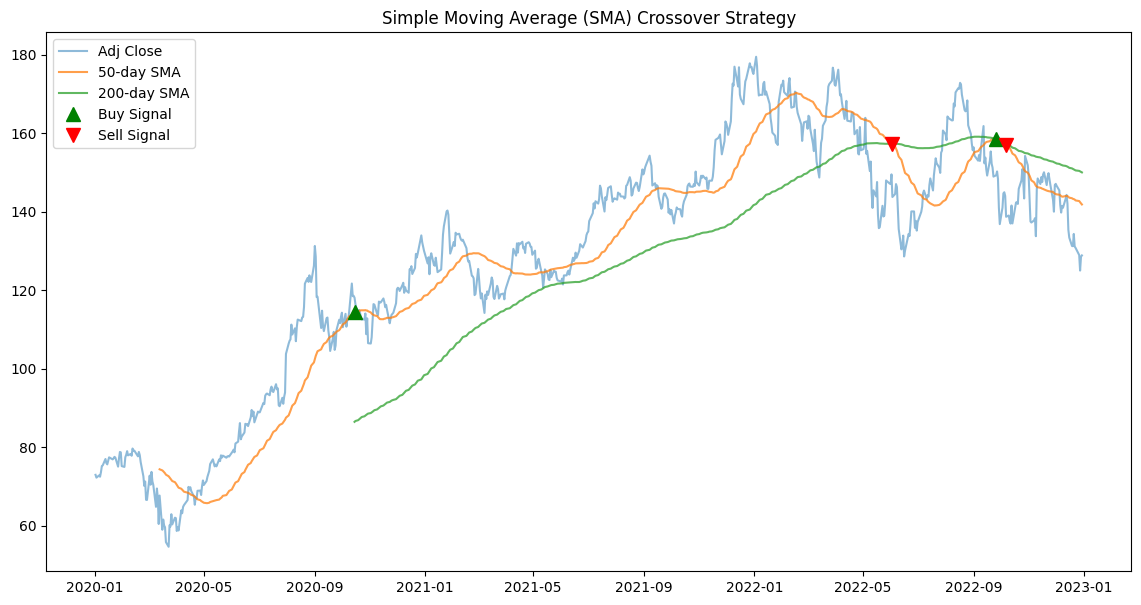

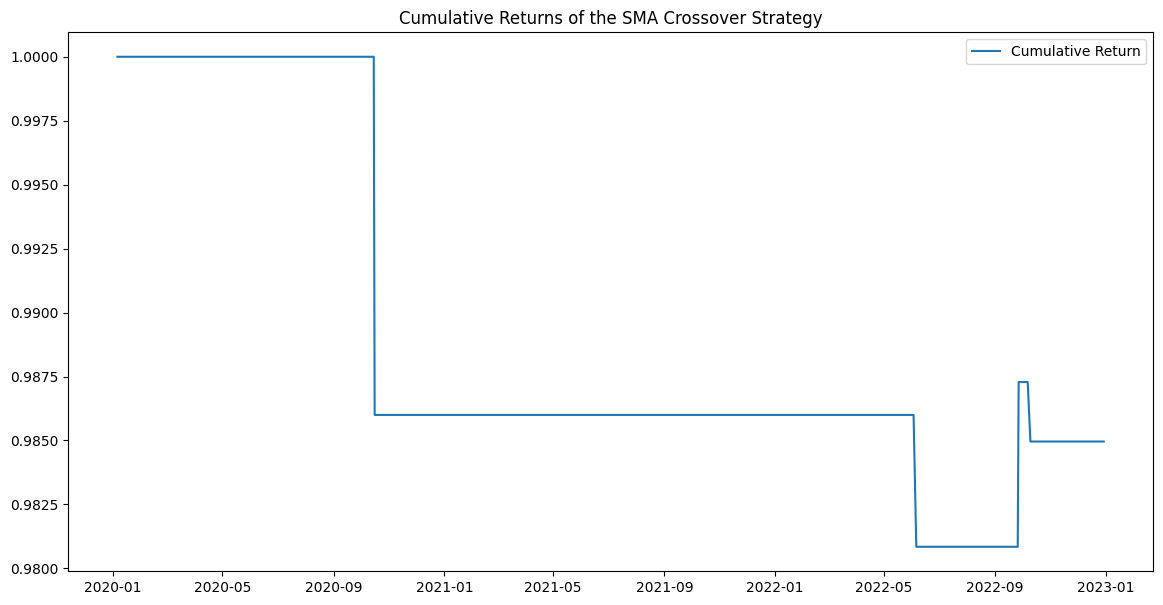

In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the stock and the moving average windows
stock = 'AAPL'
short_window = 50
long_window = 200

# Download historical price data
start_date = '2020-01-01'
end_date = '2023-01-01'
data = yf.download(stock, start=start_date, end=end_date)['Adj Close']

# Calculate the short-term and long-term SMAs
data = pd.DataFrame(data)
data['SMA50'] = data['Adj Close'].rolling(window=short_window).mean()
data['SMA200'] = data['Adj Close'].rolling(window=long_window).mean()

# Identify the crossover points
data['Signal'] = 0.0
data['Signal'][short_window:] = np.where(data['SMA50'][short_window:] > data['SMA200'][short_window:], 1.0, 0.0)
data['Position'] = data['Signal'].diff()

# Plot the closing price and the SMAs
plt.figure(figsize=(14, 7))
plt.plot(data['Adj Close'], label='Adj Close', alpha=0.5)
plt.plot(data['SMA50'], label='50-day SMA', alpha=0.75)
plt.plot(data['SMA200'], label='200-day SMA', alpha=0.75)

# Plot buy signals
plt.plot(data[data['Position'] == 1].index, data['SMA50'][data['Position'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
# Plot sell signals
plt.plot(data[data['Position'] == -1].index, data['SMA50'][data['Position'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('Simple Moving Average (SMA) Crossover Strategy')
plt.legend()
plt.show()

# Calculate the strategy returns
data['Return'] = data['Adj Close'].pct_change()
data['Strategy Return'] = data['Return'] * data['Position'].shift()

# Plot cumulative returns of the strategy
data['Cumulative Return'] = (1 + data['Strategy Return']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the SMA Crossover Strategy')
plt.legend()
plt.show()


#### B. Exponential Moving Average (EMA) Crossover

The Exponential Moving Average (EMA) Crossover strategy is similar to the SMA Crossover but gives more weight to recent prices. This makes the EMA more responsive to recent price changes compared to the SMA.

#### Python Example of EMA Crossover Strategy

```python
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the stock and the moving average windows
stock = 'AAPL'
short_window = 12
long_window = 26

# Download historical price data
start_date = '2020-01-01'
end_date = '2023-01-01'
data = yf.download(stock, start=start_date, end=end_date)['Adj Close']

# Calculate the short-term and long-term EMAs
data = pd.DataFrame(data)
data['EMA12'] = data['Adj Close'].ewm(span=short_window, adjust=False).mean()
data['EMA26'] = data['Adj Close'].ewm(span=long_window, adjust=False).mean()

# Identify the crossover points
data['Signal'] = 0.0
data['Signal'][short_window:] = np.where(data['EMA12'][short_window:] > data['EMA26'][short_window:], 1.0, 0.0)
data['Position'] = data['Signal'].diff()

# Plot the closing price and the EMAs
plt.figure(figsize=(14, 7))
plt.plot(data['Adj Close'], label='Adj Close', alpha=0.5)
plt.plot(data['EMA12'], label='12-day EMA', alpha=0.75)
plt.plot(data['EMA26'], label='26-day EMA', alpha=0.75)

# Plot buy signals
plt.plot(data[data['Position'] == 1].index, data['EMA12'][data['Position'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
# Plot sell signals
plt.plot(data[data['Position'] == -1].index, data['EMA12'][data['Position'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('Exponential Moving Average (EMA) Crossover Strategy')
plt.legend()
plt.show()

# Calculate the strategy returns
data['Return'] = data['Adj Close'].pct_change()
data['Strategy Return'] = data['Return'] * data['Position'].shift()

# Plot cumulative returns of the strategy
data['Cumulative Return'] = (1 + data['Strategy Return']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the EMA Crossover Strategy')
plt.legend()
plt.show()
```

#### C. Relative Strength Index (RSI)

The Relative Strength Index (RSI) measures the magnitude of recent price changes to evaluate overbought or oversold conditions. Traders use RSI to identify potential reversal points in the market.

#### Python Example of RSI Strategy

```python
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the stock and RSI period
stock = 'AAPL'
rsi_period = 14

# Download historical price data
start_date = '2020-01-01'
end_date = '2023-01-01'
data = yf.download(stock, start=start_date, end=end_date)['Adj Close']

# Calculate RSI
data = pd.DataFrame(data)
delta = data['Adj Close'].diff()
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)
avg_gain = pd.Series(gain).rolling(window=rsi_period).mean()
avg_loss = pd.Series(loss).rolling(window=rsi_period).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Identify buy and sell signals
data['Signal'] = 0.0
data['Signal'][rsi_period:] = np.where(data['RSI'][rsi_period:] < 30, 1.0, np.where(data['RSI'][rsi_period:] > 70, -1.0, 0.0))
data['Position'] = data['Signal'].diff()

# Plot the closing price and RSI
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data['Adj Close'], label='Adj Close')
plt.title('RSI Strategy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data['RSI'], label='RSI')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.scatter(data.index[data['Position'] == 1], data['RSI'][data['Position'] == 1], marker='^', color='green', label='Buy Signal')
plt.scatter(data.index[data['Position'] == -1], data['RSI'][data['Position'] == -1], marker='v', color='red', label='Sell Signal')
plt.legend()

plt.show()

# Calculate the strategy returns
data['Return'] = data['Adj Close'].pct_change()
data['Strategy Return'] = data['Return'] * data['Position'].shift()

# Plot cumulative returns of the strategy
data['Cumulative Return'] = (1 + data['Strategy Return']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the RSI Strategy')
plt.legend()
plt.show()
```

#### D. Moving Average Convergence Divergence (MACD)

The Moving Average Convergence Divergence (MACD) uses the difference between a short-term EMA and a long-term EMA to identify momentum. The MACD line is often compared to a signal line (usually a 9-day EMA of the MACD line) to generate buy and sell signals.

#### Python Example of MACD Strategy

```python
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the stock and MACD parameters
stock = 'AAPL'
short_window = 12
long_window = 26
signal_window = 9

# Download historical price data
start_date = '2020-01-01'
end_date = '2023-01-01'
data = yf.download(stock, start=start_date, end=end_date)['Adj Close']

# Calculate the short-term and long-term EMAs and MACD
data = pd.DataFrame(data)
data['EMA12'] = data['Adj Close'].ewm(span=short_window, adjust=False).mean()
data['EMA26'] = data['Adj Close'].ewm(span=long_window, adjust=False).mean()
data['MACD'] = data['EMA12'] - data['EMA26']
data['Signal'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

# Identify buy and sell signals
data['Position'] = np.where(data['MACD'] > data['Signal'], 1, -1)
data['Signal'] = data['Position'].diff()

# Plot the closing price, MACD, and Signal Line
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data['Adj Close'], label='Adj Close')
plt.title('MACD Strategy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data['MACD'], label='MACD')
plt.plot(data['Signal'], label='Signal Line')
plt.scatter(data.index[data['Signal'] == 1], data['MACD'][data['Signal'] == 1], marker='^', color='green', label='Buy Signal')
plt.scatter(data.index[data['Signal'] == -1], data['MACD'][data['Signal'] == -1], marker='v', color='red', label='Sell Signal')
plt.legend()

plt.show()

# Calculate the strategy returns
data['Return'] = data['Adj Close'].pct_change()
data['Strategy Return'] = data['Return'] * data['Position'].shift()

# Plot cumulative returns of the strategy
data['Cumulative Return'] = (1 + data['Strategy Return']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the MACD Strategy')
plt.legend()
plt.show()
```

#### E. Bollinger Bands

Bollinger Bands use standard deviation bands around a moving average to identify overbought or oversold conditions. The strategy involves buying when the price touches the lower band and selling when the price touches the upper band.

#### Python Example of Bollinger Bands Strategy

```python
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the stock and Bollinger Bands parameters
stock = 'AAPL'
window = 20
no_of_std = 2

# Download historical price data
start_date = '2020-01-01'
end_date = '2023-01-01'
data = yf.download(stock, start=start_date, end=end_date)['Adj Close']

# Calculate the moving average and standard deviation
data = pd.DataFrame(data)
data['MA20'] = data['Adj Close'].rolling(window).mean()
data['STD'] =

 data['Adj Close'].rolling(window).std()
data['Upper Band'] = data['MA20'] + (data['STD'] * no_of_std)
data['Lower Band'] = data['MA20'] - (data['STD'] * no_of_std)

# Identify buy and sell signals
data['Position'] = np.where(data['Adj Close'] < data['Lower Band'], 1, np.where(data['Adj Close'] > data['Upper Band'], -1, 0))
data['Signal'] = data['Position'].diff()

# Plot the closing price and Bollinger Bands
plt.figure(figsize=(14, 7))
plt.plot(data['Adj Close'], label='Adj Close')
plt.plot(data['MA20'], label='20-day MA')
plt.plot(data['Upper Band'], label='Upper Band', linestyle='--')
plt.plot(data['Lower Band'], label='Lower Band', linestyle='--')

# Plot buy signals
plt.plot(data[data['Signal'] == 1].index, data['Adj Close'][data['Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
# Plot sell signals
plt.plot(data[data['Signal'] == -1].index, data['Adj Close'][data['Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('Bollinger Bands Strategy')
plt.legend()
plt.show()

# Calculate the strategy returns
data['Return'] = data['Adj Close'].pct_change()
data['Strategy Return'] = data['Return'] * data['Position'].shift()

# Plot cumulative returns of the strategy
data['Cumulative Return'] = (1 + data['Strategy Return']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the Bollinger Bands Strategy')
plt.legend()
plt.show()
```

#### F. Momentum Indicator

The Momentum Indicator measures the rate of change in prices. Traders use it to identify the strength of a trend. A crossing of the zero line can signal a potential buy or sell opportunity.

#### Python Example of Momentum Indicator Strategy

```python
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the stock and momentum period
stock = 'AAPL'
momentum_period = 10

# Download historical price data
start_date = '2020-01-01'
end_date = '2023-01-01'
data = yf.download(stock, start=start_date, end=end_date)['Adj Close']

# Calculate the momentum indicator
data = pd.DataFrame(data)
data['Momentum'] = data['Adj Close'].diff(momentum_period)

# Identify buy and sell signals
data['Position'] = np.where(data['Momentum'] > 0, 1, -1)
data['Signal'] = data['Position'].diff()

# Plot the closing price and momentum
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data['Adj Close'], label='Adj Close')
plt.title('Momentum Indicator Strategy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data['Momentum'], label='Momentum')
plt.axhline(0, linestyle='--', alpha=0.5, color='black')
plt.scatter(data.index[data['Signal'] == 1], data['Momentum'][data['Signal'] == 1], marker='^', color='green', label='Buy Signal')
plt.scatter(data.index[data['Signal'] == -1], data['Momentum'][data['Signal'] == -1], marker='v', color='red', label='Sell Signal')
plt.legend()

plt.show()

# Calculate the strategy returns
data['Return'] = data['Adj Close'].pct_change()
data['Strategy Return'] = data['Return'] * data['Position'].shift()

# Plot cumulative returns of the strategy
data['Cumulative Return'] = (1 + data['Strategy Return']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the Momentum Indicator Strategy')
plt.legend()
plt.show()
```

#### G. Rate of Change (ROC)

The Rate of Change (ROC) measures the percentage change in price over a specified time period. It is used to identify the strength of a trend. A crossing of the zero line can signal a potential buy or sell opportunity.

#### Python Example of ROC Strategy

```python
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the stock and ROC period
stock = 'AAPL'
roc_period = 10

# Download historical price data
start_date = '2020-01-01'
end_date = '2023-01-01'
data = yf.download(stock, start=start_date, end=end_date)['Adj Close']

# Calculate the ROC indicator
data = pd.DataFrame(data)
data['ROC'] = ((data['Adj Close'] - data['Adj Close'].shift(roc_period)) / data['Adj Close'].shift(roc_period)) * 100

# Identify buy and sell signals
data['Position'] = np.where(data['ROC'] > 0, 1, -1)
data['Signal'] = data['Position'].diff()

# Plot the closing price and ROC
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data['Adj Close'], label='Adj Close')
plt.title('Rate of Change (ROC) Strategy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data['ROC'], label='ROC')
plt.axhline(0, linestyle='--', alpha=0.5, color='black')
plt.scatter(data.index[data['Signal'] == 1], data['ROC'][data['Signal'] == 1], marker='^', color='green', label='Buy Signal')
plt.scatter(data.index[data['Signal'] == -1], data['ROC'][data['Signal'] == -1], marker='v', color='red', label='Sell Signal')
plt.legend()

plt.show()

# Calculate the strategy returns
data['Return'] = data['Adj Close'].pct_change()
data['Strategy Return'] = data['Return'] * data['Position'].shift()

# Plot cumulative returns of the strategy
data['Cumulative Return'] = (1 + data['Strategy Return']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the ROC Strategy')
plt.legend()
plt.show()
```

#### H. Volume-Weighted Average Price (VWAP)

The Volume-Weighted Average Price (VWAP) provides the average price a security has traded at throughout the day, based on both volume and price. Traders often use it as a benchmark to determine the quality of their trades.

#### Python Example of VWAP Strategy

```python
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the stock and download intraday price data
stock = 'AAPL'
start_date = '2022-01-01'
end_date = '2022-01-05'

data = yf.download(stock, start=start_date, end=end_date, interval='1m')[['Adj Close', 'Volume']]

# Calculate VWAP
data['Cum_Volume'] = data['Volume'].cumsum()
data['Cum_Price_Vol'] = (data['Adj Close'] * data['Volume']).cumsum()
data['VWAP'] = data['Cum_Price_Vol'] / data['Cum_Volume']

# Identify buy and sell signals
data['Position'] = np.where(data['Adj Close'] > data['VWAP'], 1, -1)
data['Signal'] = data['Position'].diff()

# Plot the closing price and VWAP
plt.figure(figsize=(14, 7))
plt.plot(data['Adj Close'], label='Adj Close')
plt.plot(data['VWAP'], label='VWAP', linestyle='--')

# Plot buy signals
plt.plot(data[data['Signal'] == 1].index, data['Adj Close'][data['Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
# Plot sell signals
plt.plot(data[data['Signal'] == -1].index, data['Adj Close'][data['Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('Volume-Weighted Average Price (VWAP) Strategy')
plt.legend()
plt.show()

# Calculate the strategy returns
data['Return'] = data['Adj Close'].pct_change()
data['Strategy Return'] = data['Return'] * data['Position'].shift()

# Plot cumulative returns of the strategy
data['Cumulative Return'] = (1 + data['Strategy Return']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the VWAP Strategy')
plt.legend()
plt.show()
```

#### I. Price Channel Breakout

The Price Channel Breakout strategy uses price channels formed by recent highs and lows to identify breakouts. The strategy involves buying when the price breaks above the upper channel and selling when the price breaks below the lower channel.

#### Python Example of Price Channel Breakout Strategy

```python
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the stock and price channel

 parameters
stock = 'AAPL'
window = 20

# Download historical price data
start_date = '2020-01-01'
end_date = '2023-01-01'
data = yf.download(stock, start=start_date, end=end_date)['Adj Close']

# Calculate the price channels
data = pd.DataFrame(data)
data['High Channel'] = data['Adj Close'].rolling(window).max()
data['Low Channel'] = data['Adj Close'].rolling(window).min()

# Identify buy and sell signals
data['Position'] = np.where(data['Adj Close'] > data['High Channel'].shift(1), 1, np.where(data['Adj Close'] < data['Low Channel'].shift(1), -1, 0))
data['Signal'] = data['Position'].diff()

# Plot the closing price and price channels
plt.figure(figsize=(14, 7))
plt.plot(data['Adj Close'], label='Adj Close')
plt.plot(data['High Channel'], label='High Channel', linestyle='--')
plt.plot(data['Low Channel'], label='Low Channel', linestyle='--')

# Plot buy signals
plt.plot(data[data['Signal'] == 1].index, data['Adj Close'][data['Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
# Plot sell signals
plt.plot(data[data['Signal'] == -1].index, data['Adj Close'][data['Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('Price Channel Breakout Strategy')
plt.legend()
plt.show()

# Calculate the strategy returns
data['Return'] = data['Adj Close'].pct_change()
data['Strategy Return'] = data['Return'] * data['Position'].shift()

# Plot cumulative returns of the strategy
data['Cumulative Return'] = (1 + data['Strategy Return']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the Price Channel Breakout Strategy')
plt.legend()
plt.show()
```

### J. Momentum Oscillator

The Momentum Oscillator identifies the strength and direction of momentum. It is used to determine potential buy and sell signals based on specific thresholds.

#### Python Example of Momentum Oscillator Strategy

```python
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the stock and momentum oscillator period
stock = 'AAPL'
momentum_period = 10

# Download historical price data
start_date = '2020-01-01'
end_date = '2023-01-01'
data = yf.download(stock, start=start_date, end=end_date)['Adj Close']

# Calculate the momentum oscillator
data = pd.DataFrame(data)
data['Momentum Oscillator'] = data['Adj Close'] - data['Adj Close'].shift(momentum_period)

# Identify buy and sell signals
upper_threshold = 80
lower_threshold = 20
data['Position'] = np.where(data['Momentum Oscillator'] > upper_threshold, -1, np.where(data['Momentum Oscillator'] < lower_threshold, 1, 0))
data['Signal'] = data['Position'].diff()

# Plot the closing price and momentum oscillator
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data['Adj Close'], label='Adj Close')
plt.title('Momentum Oscillator Strategy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data['Momentum Oscillator'], label='Momentum Oscillator')
plt.axhline(upper_threshold, linestyle='--', alpha=0.5, color='red')
plt.axhline(lower_threshold, linestyle='--', alpha=0.5, color='green')
plt.scatter(data.index[data['Signal'] == 1], data['Momentum Oscillator'][data['Signal'] == 1], marker='^', color='green', label='Buy Signal')
plt.scatter(data.index[data['Signal'] == -1], data['Momentum Oscillator'][data['Signal'] == -1], marker='v', color='red', label='Sell Signal')
plt.legend()

plt.show()

# Calculate the strategy returns
data['Return'] = data['Adj Close'].pct_change()
data['Strategy Return'] = data['Return'] * data['Position'].shift()

# Plot cumulative returns of the strategy
data['Cumulative Return'] = (1 + data['Strategy Return']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the Momentum Oscillator Strategy')
plt.legend()
plt.show()
```

### K. Stochastic Oscillator

The Stochastic Oscillator compares a particular closing price of a security to a range of its prices over a certain period of time. It is used to identify overbought or oversold conditions.

#### Python Example of Stochastic Oscillator Strategy

```python
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the stock and stochastic oscillator period
stock = 'AAPL'
stochastic_period = 14

# Download historical price data
start_date = '2020-01-01'
end_date = '2023-01-01'
data = yf.download(stock, start=start_date, end=end_date)['Adj Close']

# Calculate the stochastic oscillator
data = pd.DataFrame(data)
data['Low14'] = data['Adj Close'].rolling(stochastic_period).min()
data['High14'] = data['Adj Close'].rolling(stochastic_period).max()
data['%K'] = (data['Adj Close'] - data['Low14']) / (data['High14'] - data['Low14']) * 100
data['%D'] = data['%K'].rolling(3).mean()

# Identify buy and sell signals
data['Position'] = np.where(data['%K'] > data['%D'], 1, -1)
data['Signal'] = data['Position'].diff()

# Plot the closing price and stochastic oscillator
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data['Adj Close'], label='Adj Close')
plt.title('Stochastic Oscillator Strategy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data['%K'], label='%K')
plt.plot(data['%D'], label='%D')
plt.axhline(80, linestyle='--', alpha=0.5, color='red')
plt.axhline(20, linestyle='--', alpha=0.5, color='green')
plt.scatter(data.index[data['Signal'] == 1], data['%K'][data['Signal'] == 1], marker='^', color='green', label='Buy Signal')
plt.scatter(data.index[data['Signal'] == -1], data['%K'][data['Signal'] == -1], marker='v', color='red', label='Sell Signal')
plt.legend()

plt.show()

# Calculate the strategy returns
data['Return'] = data['Adj Close'].pct_change()
data['Strategy Return'] = data['Return'] * data['Position'].shift()

# Plot cumulative returns of the strategy
data['Cumulative Return'] = (1 + data['Strategy Return']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the Stochastic Oscillator Strategy')
plt.legend()
plt.show()
```

#### L. Relative Vigor Index (RVI)

The Relative Vigor Index (RVI) measures the conviction of a recent price move and the likelihood that it will continue. It is used to identify potential buy and sell signals.

#### Python Example of RVI Strategy

```python
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the stock and RVI period
stock = 'AAPL'
rvi_period = 10

# Download historical price data
start_date = '2020-01-01'
end_date = '2023-01-01'
data = yf.download(stock, start=start_date, end=end_date)['Adj Close']

# Calculate the RVI
data = pd.DataFrame(data)
data['Close-Open'] = data['Adj Close'] - data['Adj Close'].shift(1)
data['High-Low'] = data['Adj Close'].rolling(rvi_period).max() - data['Adj Close'].rolling(rvi_period).min()
data['RVI'] = (data['Close-Open'].rolling(rvi_period).mean() / data['High-Low'].rolling(rvi_period).mean())
data['Signal'] = data['RVI'].rolling(4).mean()

# Identify buy and sell signals
data['Position'] = np.where(data['RVI'] > data['Signal'], 1, -1)
data['Trade Signal'] = data['Position'].diff()

# Plot the closing price and RVI
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data['Adj Close'], label='Adj Close')
plt.title('Relative Vigor Index (RVI) Strategy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data['RVI'], label='RVI')
plt.plot(data['Signal'], label='Signal')
plt.scatter(data.index[data['Trade Signal'] == 1], data['RVI'][data['Trade Signal'] == 1], marker='^', color='green', label='Buy

 Signal')
plt.scatter(data.index[data['Trade Signal'] == -1], data['RVI'][data['Trade Signal'] == -1], marker='v', color='red', label='Sell Signal')
plt.legend()

plt.show()

# Calculate the strategy returns
data['Return'] = data['Adj Close'].pct_change()
data['Strategy Return'] = data['Return'] * data['Position'].shift()

# Plot cumulative returns of the strategy
data['Cumulative Return'] = (1 + data['Strategy Return']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the RVI Strategy')
plt.legend()
plt.show()
```

#### M. Ichimoku Cloud

The Ichimoku Cloud is a comprehensive indicator that defines support and resistance, identifies trend direction, gauges momentum, and provides trading signals. The strategy involves buying when the price moves above the cloud and selling when the price moves below the cloud.

#### Python Example of Ichimoku Cloud Strategy

```python
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the stock and Ichimoku Cloud parameters
stock = 'AAPL'

# Download historical price data
start_date = '2020-01-01'
end_date = '2023-01-01'
data = yf.download(stock, start=start_date, end=end_date)[['High', 'Low', 'Adj Close']]

# Calculate the Ichimoku Cloud components
data = pd.DataFrame(data)
data['Tenkan-sen'] = (data['High'].rolling(9).max() + data['Low'].rolling(9).min()) / 2
data['Kijun-sen'] = (data['High'].rolling(26).max() + data['Low'].rolling(26).min()) / 2
data['Senkou Span A'] = ((data['Tenkan-sen'] + data['Kijun-sen']) / 2).shift(26)
data['Senkou Span B'] = ((data['High'].rolling(52).max() + data['Low'].rolling(52).min()) / 2).shift(26)
data['Chikou Span'] = data['Adj Close'].shift(-26)

# Identify buy and sell signals
data['Position'] = np.where(data['Adj Close'] > data['Senkou Span A'], 1, np.where(data['Adj Close'] < data['Senkou Span B'], -1, 0))
data['Signal'] = data['Position'].diff()

# Plot the closing price and Ichimoku Cloud
plt.figure(figsize=(14, 7))
plt.plot(data['Adj Close'], label='Adj Close')
plt.plot(data['Tenkan-sen'], label='Tenkan-sen')
plt.plot(data['Kijun-sen'], label='Kijun-sen')
plt.fill_between(data.index, data['Senkou Span A'], data['Senkou Span B'], where=data['Senkou Span A'] >= data['Senkou Span B'], facecolor='green', alpha=0.3)
plt.fill_between(data.index, data['Senkou Span A'], data['Senkou Span B'], where=data['Senkou Span A'] < data['Senkou Span B'], facecolor='red', alpha=0.3)

# Plot buy signals
plt.plot(data[data['Signal'] == 1].index, data['Adj Close'][data['Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
# Plot sell signals
plt.plot(data[data['Signal'] == -1].index, data['Adj Close'][data['Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('Ichimoku Cloud Strategy')
plt.legend()
plt.show()

# Calculate the strategy returns
data['Return'] = data['Adj Close'].pct_change()
data['Strategy Return'] = data['Return'] * data['Position'].shift()

# Plot cumulative returns of the strategy
data['Cumulative Return'] = (1 + data['Strategy Return']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the Ichimoku Cloud Strategy')
plt.legend()
plt.show()
```

#### N. Momentum-Based ETFs and Mutual Funds

Momentum-based ETFs and mutual funds follow a momentum strategy by selecting stocks that have performed well recently. This example will focus on a hypothetical momentum ETF strategy.

#### Python Example of Momentum-Based ETFs Strategy

```python
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the momentum ETF (using a hypothetical ticker)
etf = 'MTUM'  # iShares MSCI USA Momentum Factor ETF

# Download historical price data
start_date = '2020-01-01'
end_date = '2023-01-01'
data = yf.download(etf, start=start_date, end=end_date)['Adj Close']

# Calculate the returns
data = pd.DataFrame(data)
data['Return'] = data['Adj Close'].pct_change()

# Calculate the cumulative returns
data['Cumulative Return'] = (1 + data['Return']).cumprod()

# Plot the cumulative returns of the ETF
plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the Momentum ETF Strategy')
plt.legend()
plt.show()
```

#### O. Sector Rotation

Sector rotation involves rotating investments among different sectors based on their momentum. This example will focus on a hypothetical sector rotation strategy using ETFs representing different sectors.

#### Python Example of Sector Rotation Strategy

```python
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the sector ETFs (example tickers)
sectors = ['XLY', 'XLF', 'XLK', 'XLE', 'XLV']  # Consumer Discretionary, Financials, Technology, Energy, Health Care

# Download historical price data
start_date = '2020-01-01'
end_date = '2023-01-01'
data = yf.download(sectors, start=start_date, end=end_date)['Adj Close']

# Calculate the returns for each sector
returns = data.pct_change()

# Calculate the rolling mean return for each sector
rolling_returns = returns.rolling(window=3).mean()

# Identify the sector with the highest momentum
momentum_sector = rolling_returns.idxmax(axis=1)

# Create a DataFrame to store the strategy returns
strategy_returns = pd.DataFrame(index=returns.index)

# Calculate the strategy returns by investing in the sector with the highest momentum
for date in returns.index:
    if pd.notna(momentum_sector[date]):
        strategy_returns.loc[date, 'Strategy Return'] = returns.loc[date, momentum_sector[date]]
    else:
        strategy_returns.loc[date, 'Strategy Return'] = 0

# Calculate the cumulative returns of the strategy
strategy_returns['Cumulative Return'] = (1 + strategy_returns['Strategy Return']).cumprod()

# Plot the cumulative returns of the sector rotation strategy
plt.figure(figsize=(14, 7))
plt.plot(strategy_returns['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the Sector Rotation Strategy')
plt.legend()
plt.show()
```

#### P. Relative Momentum

Relative momentum compares the momentum of one asset to another or to a benchmark. This example will focus on comparing the momentum of a stock to a benchmark index.

#### Python Example of Relative Momentum Strategy

```python
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the stock and benchmark index
stock = 'AAPL'
benchmark = '^GSPC'  # S&P 500

# Download historical price data
start_date = '2020-01-01'
end_date = '2023-01-01'
stock_data = yf.download(stock, start=start_date, end=end_date)['Adj Close']
benchmark_data = yf.download(benchmark, start=start_date, end=end_date)['Adj Close']

# Calculate the returns
stock_returns = stock_data.pct_change()
benchmark_returns = benchmark_data.pct_change()

# Calculate the relative momentum
relative_momentum = stock_returns - benchmark_returns

# Identify buy and sell signals based on relative momentum
signal_threshold = 0.01
relative_momentum_signal = np.where(relative_momentum > signal_threshold, 1, np.where(relative_momentum < -signal_threshold, -1, 0))
relative_momentum_position = np.where(relative_momentum_signal > 0, 1, np.where(relative_momentum_signal < 0, -1, 0))

# Plot the closing price and relative momentum
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(stock_data, label='Adj Close')
plt.title('Relative Momentum Strategy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(relative_momentum, label='Relative Momentum')
plt.axhline(signal_threshold, linestyle='--', alpha=0.5, color='green')
plt.axhline(-signal_threshold, linestyle='--', alpha=0.5, color='red')
plt.scatter(stock_data.index[relative_momentum_signal == 1], relative_momentum[relative_momentum_signal == 1], marker='^', color='green', label='Buy Signal')
plt.scatter(stock_data.index[relative_momentum_signal == -1], relative_momentum[relative_momentum_signal == -1], marker='v', color='red', label='Sell Signal')
plt.legend()

plt.show()

# Calculate the strategy returns
strategy_returns = stock_returns * relative_momentum_position.shift()

# Calculate the cumulative returns of the strategy
strategy_cumulative_returns = (1 + strategy_returns).cumprod()

# Plot the cumulative returns of the relative momentum strategy
plt.figure(figsize=(14, 7))
plt.plot(strategy_cumulative_returns, label='Cumulative Return')
plt.title('Cumulative Returns of the Relative Momentum Strategy')
plt.legend()
plt.show()
```

## 3. Mean Reversion
Mean reversion is based on the concept that asset prices tend to revert to their historical averages over time. This strategy identifies overbought or oversold conditions and takes positions anticipating a price correction. Mean reversion traders often use indicators such as Bollinger Bands and moving average convergence divergence (MACD) to determine entry and exit points. This approach assumes that extreme price movements are temporary and will revert to the mean.

### Key Points:
- Assumes prices will revert to historical averages.
- Identifies overbought and oversold conditions.
- Utilizes technical indicators to time trades.


### A.Bollinger Bands

Bollinger Bands are a type of statistical chart characterizing the prices and volatility over time of a financial instrument. Developed by John Bollinger, they consist of:

1. **Middle Band**: A simple moving average (SMA) of the asset's price, typically a 20-period SMA.
2. **Upper Band**: The middle band plus two standard deviations of the asset's price.
3. **Lower Band**: The middle band minus two standard deviations of the asset's price.

The bands widen when volatility increases and narrow when volatility decreases. The strategy involves buying when the price touches the lower band (indicating potential oversold conditions) and selling when the price touches the upper band (indicating potential overbought conditions).

### Python Example of Bollinger Bands Strategy


1. **Data Download**: The script uses the `yfinance` library to download historical price data for a specified stock (AAPL in this example) from Yahoo Finance.
2. **Bollinger Bands Calculation**: The script calculates the 20-day simple moving average (SMA), standard deviation, and Bollinger Bands (upper and lower).
3. **Identify Buy and Sell Signals**: The script generates buy signals when the price touches the lower Bollinger Band and sell signals when the price touches the upper Bollinger Band. The `Position` column is set to 1 for buy signals and -1 for sell signals, with `Signal` indicating changes in position.
4. **Plot the Closing Price and Bollinger Bands**: The script plots the stock's adjusted closing prices along with the 20-day SMA and Bollinger Bands. Buy signals are marked with green arrows, and sell signals are marked with red arrows.
5. **Calculate Strategy Returns**: The script calculates the daily returns of the stock and the returns of the Bollinger Bands strategy by multiplying the stock's daily returns by the position shifted by one day.
6. **Plot Cumulative Returns**: The script calculates and plots the cumulative returns of the Bollinger Bands strategy.

This code provides a visual representation of the Bollinger Bands strategy's buy and sell signals and evaluates the performance of the strategy through cumulative returns.









[*********************100%%**********************]  1 of 1 completed


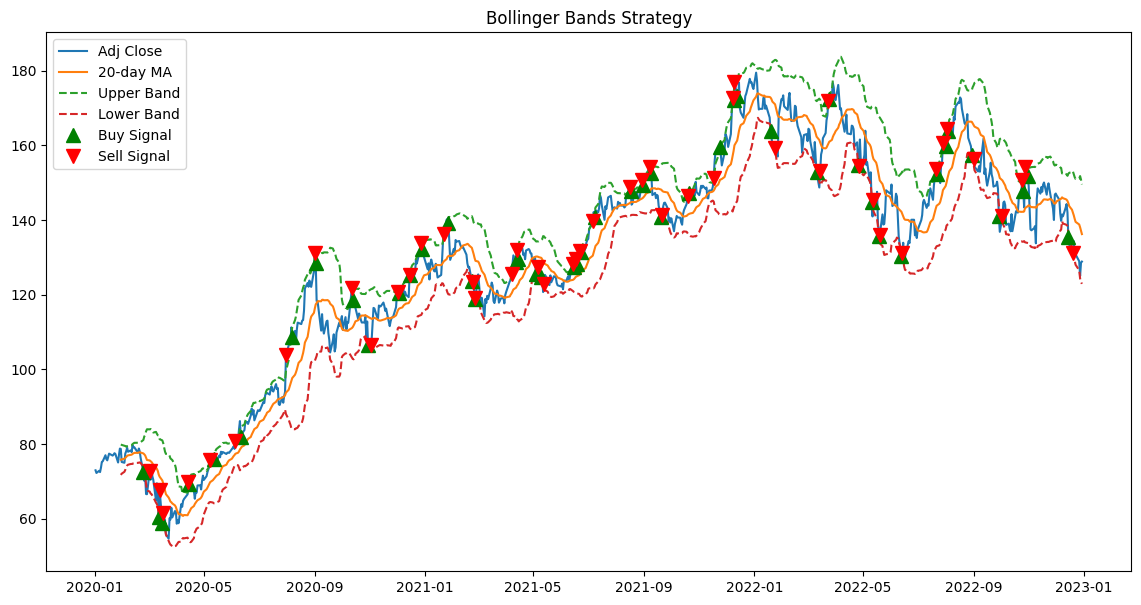

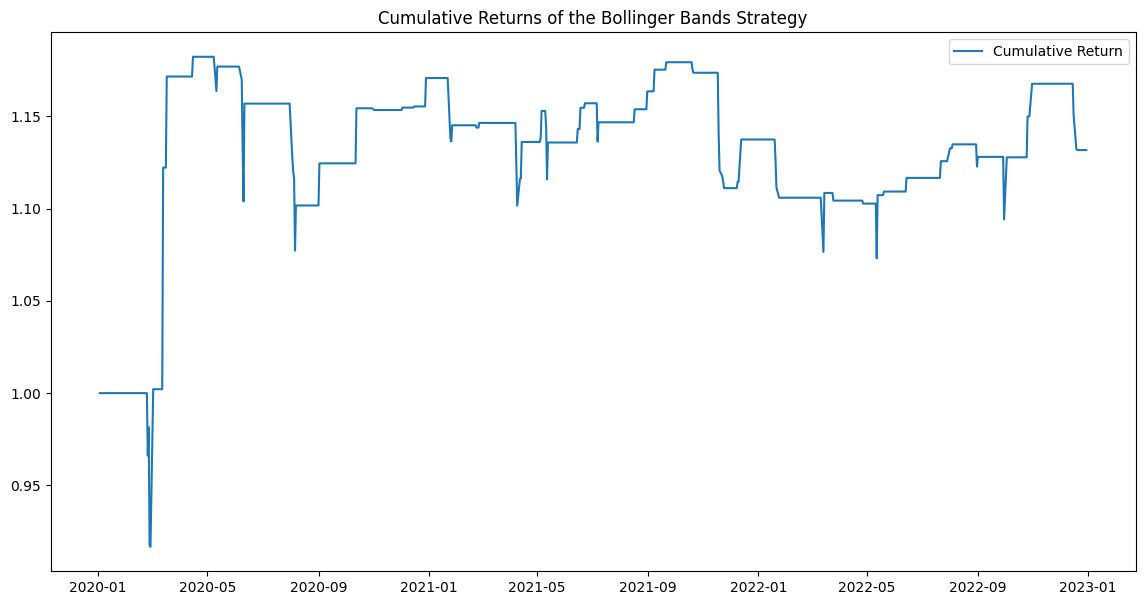

In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the stock and Bollinger Bands parameters
stock = 'AAPL'
window = 20
no_of_std = 2

# Download historical price data
start_date = '2020-01-01'
end_date = '2023-01-01'
data = yf.download(stock, start=start_date, end=end_date)['Adj Close']

# Calculate the moving average and standard deviation
data = pd.DataFrame(data)
data['MA20'] = data['Adj Close'].rolling(window).mean()
data['STD'] = data['Adj Close'].rolling(window).std()
data['Upper Band'] = data['MA20'] + (data['STD'] * no_of_std)
data['Lower Band'] = data['MA20'] - (data['STD'] * no_of_std)

# Identify buy and sell signals
data['Position'] = np.where(data['Adj Close'] < data['Lower Band'], 1, np.where(data['Adj Close'] > data['Upper Band'], -1, 0))
data['Signal'] = data['Position'].diff()

# Plot the closing price and Bollinger Bands
plt.figure(figsize=(14, 7))
plt.plot(data['Adj Close'], label='Adj Close')
plt.plot(data['MA20'], label='20-day MA')
plt.plot(data['Upper Band'], label='Upper Band', linestyle='--')
plt.plot(data['Lower Band'], label='Lower Band', linestyle='--')

# Plot buy signals
plt.plot(data[data['Signal'] == 1].index, data['Adj Close'][data['Signal'] == 1], '^', markersize=10, color='green', lw=0, label='Buy Signal')
# Plot sell signals
plt.plot(data[data['Signal'] == -1].index, data['Adj Close'][data['Signal'] == -1], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

plt.title('Bollinger Bands Strategy')
plt.legend()
plt.show()

# Calculate the strategy returns
data['Return'] = data['Adj Close'].pct_change()
data['Strategy Return'] = data['Return'] * data['Position'].shift()

# Plot cumulative returns of the strategy
data['Cumulative Return'] = (1 + data['Strategy Return']).cumprod()

plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Returns of the Bollinger Bands Strategy')
plt.legend()
plt.show()

2. **Relative Strength Index (RSI)**
   - **Description**: Measures the magnitude of recent price changes to evaluate overbought or oversold conditions.
   - **Example**: Buy when the RSI crosses below 30 (indicating oversold conditions), and sell when the RSI crosses above 70 (indicating overbought conditions).

3. **Moving Average Convergence Divergence (MACD)**
   - **Description**: Uses the difference between a short-term EMA and a long-term EMA to identify overbought or oversold conditions.
   - **Example**: Buy when the MACD line crosses below the signal line in oversold territory, and sell when the MACD line crosses above the signal line in overbought territory.

4. **Stochastic Oscillator**
   - **Description**: Compares a particular closing price of a security to a range of its prices over a certain period of time.
   - **Example**: Buy when the %K line crosses below the %D line below 20, and sell when the %K line crosses above the %D line above 80.

5. **Simple Moving Average (SMA)**
   - **Description**: Uses the crossing of short-term and long-term moving averages to identify mean reversion opportunities.
   - **Example**: Buy when the price crosses above the short-term SMA after being below it, and sell when the price crosses below the short-term SMA after being above it.

6. **Pairs Trading**
   - **Description**: Involves identifying two historically correlated assets and trading the divergence and convergence in their prices.
   - **Example**: Buy the underperforming asset and short the outperforming asset when the price spread widens beyond a certain threshold, and unwind the positions when the prices converge.

7. **Keltner Channels**
   - **Description**: Uses volatility-based envelopes set above and below an exponential moving average to identify overbought or oversold conditions.
   - **Example**: Buy when the price touches the lower Keltner Channel, and sell when the price touches the upper Keltner Channel.

8. **Donchian Channels**
   - **Description**: Uses the highest high and the lowest low of the last n periods to create upper and lower bands.
   - **Example**: Buy when the price touches the lower Donchian Channel, and sell when the price touches the upper Donchian Channel.

9. **Commodity Channel Index (CCI)**
   - **Description**: Measures the deviation of the price from its average price over a given period.
   - **Example**: Buy when the CCI crosses below -100 (indicating oversold conditions), and sell when the CCI crosses above 100 (indicating overbought conditions).

10. **Volume-Weighted Average Price (VWAP) Reversion**
    - **Description**: Uses the VWAP as a benchmark to identify overbought or oversold conditions.
    - **Example**: Buy when the price is significantly below the VWAP, and sell when the price is significantly above the VWAP.

11. **Z-Score**
    - **Description**: Measures the number of standard deviations a data point is from the mean.
    - **Example**: Buy when the z-score of the price is below -2 (indicating oversold conditions), and sell when the z-score is above 2 (indicating overbought conditions).

12. **Envelope Channels**
    - **Description**: Uses percentage-based envelopes set above and below a moving average to identify overbought or oversold conditions.
    - **Example**: Buy when the price touches the lower envelope, and sell when the price touches the upper envelope.

13. **ATR Channels**
    - **Description**: Uses Average True Range (ATR) to create channels around a moving average to identify overbought or oversold conditions.
    - **Example**: Buy when the price touches the lower ATR channel, and sell when the price touches the upper ATR channel.

14. **Regression to the Mean**
    - **Description**: Uses statistical methods to predict the mean price level and identify deviations.
    - **Example**: Buy when the price deviates significantly below the predicted mean, and sell when the price deviates significantly above the predicted mean.

15. **Oscillator-Based Mean Reversion**
    - **Description**: Uses various oscillators like the Ultimate Oscillator, Williams %R, etc., to identify overbought or oversold conditions.
    - **Example**: Buy when the oscillator indicates oversold conditions, and sell when it indicates overbought conditions.



## 4. Machine Learning
Machine learning techniques are increasingly being used to develop predictive models that can forecast future price movements based on historical data patterns. This includes a range of techniques such as classification algorithms, regression models, and reinforcement learning. Machine learning models can process vast amounts of data and identify complex patterns that traditional models might miss. These models are continually refined and improved based on new data.

### Key Points:
- Utilizes advanced algorithms and computational power.
- Can process and learn from large datasets.
- Includes techniques like classification, regression, and reinforcement learning.

### Machine Learning Trading Strategies

Machine learning trading strategies involve the use of algorithms and statistical models to analyze and predict future price movements based on patterns in historical data. These strategies leverage various machine learning techniques to identify trading opportunities and optimize trading decisions. Here is a list of various machine learning trading strategies:

1. **Regression-Based Strategies**
   - **Description**: Uses regression models to predict future prices based on historical data.
   - **Example**: Linear regression, polynomial regression, and support vector regression (SVR).

2. **Classification-Based Strategies**
   - **Description**: Uses classification algorithms to predict the direction of future price movements (e.g., up or down).
   - **Example**: Logistic regression, decision trees, random forests, and support vector machines (SVM).

3. **Time Series Forecasting**
   - **Description**: Uses time series analysis to predict future price movements based on past price data.
   - **Example**: ARIMA (AutoRegressive Integrated Moving Average), SARIMA (Seasonal ARIMA), and Prophet.

4. **Reinforcement Learning**
   - **Description**: Uses reinforcement learning algorithms to develop trading strategies that learn from past trading experiences and adapt to changing market conditions.
   - **Example**: Q-learning, deep Q-networks (DQN), and policy gradient methods.

5. **Neural Networks**
   - **Description**: Uses neural networks to model complex relationships between inputs and outputs, and predict future price movements.
   - **Example**: Feedforward neural networks, recurrent neural networks (RNN), and long short-term memory (LSTM) networks.

6. **Ensemble Methods**
   - **Description**: Combines multiple machine learning models to improve prediction accuracy and robustness.
   - **Example**: Bagging, boosting, and stacking.

7. **Natural Language Processing (NLP)**
   - **Description**: Uses NLP techniques to analyze and extract insights from textual data such as news articles, social media, and financial reports.
   - **Example**: Sentiment analysis, topic modeling, and named entity recognition.

8. **Clustering-Based Strategies**
   - **Description**: Uses clustering algorithms to group similar data points and identify patterns that can inform trading decisions.
   - **Example**: K-means clustering, hierarchical clustering, and DBSCAN.

9. **Dimensionality Reduction**
   - **Description**: Uses dimensionality reduction techniques to reduce the complexity of the data and improve model performance.
   - **Example**: Principal component analysis (PCA) and t-distributed stochastic neighbor embedding (t-SNE).

10. **Anomaly Detection**
    - **Description**: Uses anomaly detection algorithms to identify unusual patterns or outliers that may indicate trading opportunities.
    - **Example**: Isolation forests, one-class SVM, and autoencoders.

11. **Genetic Algorithms**
    - **Description**: Uses genetic algorithms to optimize trading strategies by simulating the process of natural selection.
    - **Example**: Evolving trading rules and parameter optimization.

12. **Bayesian Networks**
    - **Description**: Uses Bayesian networks to model probabilistic relationships between variables and predict future price movements.
    - **Example**: Dynamic Bayesian networks and hidden Markov models.

13. **Deep Learning**
    - **Description**: Uses deep learning techniques to model complex patterns in large datasets and make accurate predictions.
    - **Example**: Convolutional neural networks (CNN) and generative adversarial networks (GAN).

14. **Meta-Learning**
    - **Description**: Uses meta-learning techniques to improve the performance of machine learning models by learning how to learn.
    - **Example**: Model-agnostic meta-learning (MAML) and neural architecture search (NAS).

15. **Transfer Learning**
    - **Description**: Uses transfer learning techniques to leverage knowledge from related tasks to improve model performance on the target task.
    - **Example**: Pre-trained models and domain adaptation.




## 5. Event-Driven Strategies
Event-driven strategies focus on trading opportunities that arise from specific events such as earnings announcements, mergers and acquisitions, or economic reports. Traders analyze the potential impact of these events on asset prices and make trades accordingly. This strategy requires a deep understanding of the events and their likely market impact. Event-driven trading often involves significant research and can be highly profitable if the market reaction to an event is correctly anticipated.

### Key Points:
- Based on specific, significant events affecting asset prices.
- Requires thorough research and analysis.
- Can be highly profitable but also risky.



### Event-Driven Trading Strategies


1. **Earnings Announcements**
   - **Description**: Trades based on the market's reaction to a company's earnings report.
   - **Example**: Buying a stock before an anticipated positive earnings report and selling it after the announcement.

2. **Merger Arbitrage**
   - **Description**: Profits from price discrepancies before and after mergers and acquisitions.
   - **Example**: Buying the stock of the company being acquired and shorting the stock of the acquiring company.

3. **Dividends Announcements**
   - **Description**: Trades based on the market's reaction to dividend announcements and changes in dividend policy.
   - **Example**: Buying a stock before the ex-dividend date to capture the dividend payment and selling it afterward.

4. **Product Launches**
   - **Description**: Trades based on the anticipated impact of a new product launch on a company's stock price.
   - **Example**: Buying shares of a tech company before a major product announcement.

5. **Economic Data Releases**
   - **Description**: Trades based on the market's reaction to macroeconomic data such as GDP, unemployment rates, and inflation.
   - **Example**: Trading currency pairs based on better-than-expected GDP growth data.

6. **Federal Reserve Announcements**
   - **Description**: Trades based on the anticipated impact of Federal Reserve policy decisions on interest rates and the economy.
   - **Example**: Buying or selling bonds based on anticipated interest rate changes.

7. **Corporate Actions**
   - **Description**: Trades based on corporate actions such as stock splits, buybacks, and spin-offs.
   - **Example**: Buying shares before a stock split is announced, expecting the price to rise.

8. **Political Events**
   - **Description**: Trades based on the anticipated impact of political events such as elections, policy changes, and geopolitical developments.
   - **Example**: Trading defense stocks based on anticipated increases in military spending.

9. **Legal and Regulatory News**
   - **Description**: Trades based on the anticipated impact of legal rulings and regulatory changes.
   - **Example**: Trading pharmaceutical stocks based on the approval or rejection of new drugs by regulatory agencies.

10. **Insider Transactions**
    - **Description**: Trades based on the activity of corporate insiders such as executives buying or selling shares in their own company.
    - **Example**: Buying shares when insiders are accumulating stock, expecting positive news.

11. **Sector-Specific Events**
    - **Description**: Trades based on events specific to a particular industry or sector.
    - **Example**: Trading airline stocks based on changes in oil prices or new regulations affecting the industry.

12. **Earnings Surprises**
    - **Description**: Trades based on the market's reaction to earnings reports that significantly deviate from analysts' expectations.
    - **Example**: Shorting a stock that has a large negative earnings surprise.

13. **Credit Events**
    - **Description**: Trades based on changes in a company's credit rating or credit spreads.
    - **Example**: Buying bonds of a company that receives a credit rating upgrade.

14. **Bankruptcy Announcements**
    - **Description**: Trades based on the market's reaction to bankruptcy filings or restructurings.
    - **Example**: Shorting the stock of a company that has filed for bankruptcy.

15. **Activist Investor Activity**
    - **Description**: Trades based on the actions of activist investors who seek to influence a company's management and strategy.
    - **Example**: Buying shares in a company targeted by an activist investor, expecting positive changes.

16. **Weather Events**
    - **Description**: Trades based on the anticipated impact of weather events such as hurricanes, droughts, and extreme temperatures.
    - **Example**: Trading agricultural commodities based on weather forecasts affecting crop yields.

17. **Trade and Tariff News**
    - **Description**: Trades based on the anticipated impact of changes in trade policies and tariffs.
    - **Example**: Trading stocks of companies that are heavily impacted by new tariffs or trade agreements.

18. **Technological Advancements**
    - **Description**: Trades based on the anticipated impact of new technological developments and innovations.
    - **Example**: Buying shares in companies leading in artificial intelligence or renewable energy.

19. **Corporate Governance Changes**
    - **Description**: Trades based on changes in a company's management, board composition, or governance policies.
    - **Example**: Buying shares in a company after a new CEO is appointed with a strong track record.

20. **Commodity Price Movements**
    - **Description**: Trades based on significant movements in commodity prices such as oil, gold, or agricultural products.
    - **Example**: Trading energy stocks based on changes in oil prices.




## 6. Sentiment Analysis
Sentiment analysis involves analyzing market sentiment using data from news articles, social media, and other sources. The underlying belief is that market sentiment can significantly influence asset prices. Traders use sentiment scores derived from natural language processing (NLP) techniques to inform their trading decisions. By understanding the market's emotional state, traders can anticipate price movements driven by collective sentiment.

### Key Points:
- Analyzes textual data to gauge market sentiment.
- Utilizes NLP techniques.
- Informs trading decisions based on collective market emotions.


### Sentiment Analysis Trading Strategies


1. **News Sentiment Analysis**
   - **Description**: Uses algorithms to analyze the sentiment of news articles and reports to predict market movements.
   - **Example**: Buying stocks with positive news sentiment and selling stocks with negative news sentiment.

2. **Social Media Sentiment Analysis**
   - **Description**: Analyzes sentiment from social media platforms like Twitter, Reddit, and StockTwits to gauge market sentiment.
   - **Example**: Buying stocks that are trending positively on social media and selling those with negative sentiment.

3. **Earnings Call Sentiment**
   - **Description**: Analyzes the sentiment of earnings call transcripts to predict future stock performance.
   - **Example**: Buying stocks after positive earnings call sentiment and selling stocks after negative earnings call sentiment.

4. **Message Board Sentiment**
   - **Description**: Uses sentiment analysis on message boards and forums like Seeking Alpha and Yahoo Finance to predict stock movements.
   - **Example**: Buying stocks with positive sentiment on message boards and selling those with negative sentiment.

5. **Analyst Report Sentiment**
   - **Description**: Analyzes the sentiment of analyst reports and recommendations to inform trading decisions.
   - **Example**: Buying stocks with positive analyst sentiment and selling stocks with negative analyst sentiment.

6. **Market Commentary Sentiment**
   - **Description**: Uses sentiment analysis on market commentaries and financial blogs to predict market trends.
   - **Example**: Buying stocks with positive commentary sentiment and selling stocks with negative commentary sentiment.

7. **Sentiment-Weighted Portfolio**
   - **Description**: Constructs a portfolio weighted by the sentiment scores of individual stocks.
   - **Example**: Allocating more capital to stocks with higher positive sentiment scores and less to those with lower scores.

8. **Volatility Sentiment Analysis**
   - **Description**: Analyzes sentiment to predict future volatility and make trading decisions accordingly.
   - **Example**: Trading options based on predicted volatility changes derived from sentiment analysis.

9. **Sector Sentiment Analysis**
   - **Description**: Analyzes sentiment for specific sectors to predict sector performance.
   - **Example**: Rotating investments into sectors with positive sentiment and out of sectors with negative sentiment.

10. **Event-Driven Sentiment Analysis**
    - **Description**: Analyzes sentiment around specific events such as earnings announcements, product launches, and regulatory changes.
    - **Example**: Trading stocks based on sentiment analysis before and after major events.

11. **Economic Sentiment Analysis**
    - **Description**: Analyzes sentiment from economic news and reports to predict macroeconomic trends.
    - **Example**: Trading currency pairs or indices based on economic sentiment.

12. **Geopolitical Sentiment Analysis**
    - **Description**: Uses sentiment analysis on geopolitical news and developments to predict market impacts.
    - **Example**: Trading commodities or indices based on geopolitical sentiment.

13. **Contrarian Sentiment Analysis**
    - **Description**: Takes the opposite position of the prevailing market sentiment.
    - **Example**: Shorting stocks with extremely positive sentiment expecting a correction, and buying stocks with extremely negative sentiment expecting a rebound.

14. **Sentiment-Based Signal Integration**
    - **Description**: Combines sentiment analysis with other trading signals to enhance decision-making.
    - **Example**: Integrating sentiment scores with technical indicators to confirm trade signals.

15. **Automated Sentiment Trading Bots**
    - **Description**: Uses automated trading systems to execute trades based on real-time sentiment analysis.
    - **Example**: Developing trading bots that scan news feeds and social media for sentiment changes and execute trades automatically.

16. **Crowdsourced Sentiment Analysis**
    - **Description**: Aggregates sentiment from multiple sources and crowds to make trading decisions.
    - **Example**: Using platforms that collect and analyze sentiment from a wide range of contributors to inform trading strategies.

17. **Sentiment-Based Risk Management**
    - **Description**: Uses sentiment analysis to adjust risk exposure in a portfolio.
    - **Example**: Reducing exposure to stocks with increasing negative sentiment and increasing exposure to stocks with positive sentiment.

18. **Market Sentiment Indices**
    - **Description**: Creates indices based on aggregated market sentiment to trade or hedge against.
    - **Example**: Trading sentiment indices that reflect the overall mood of the market.

19. **Sentiment Signal Diversification**
    - **Description**: Diversifies trading signals by incorporating sentiment analysis from various sources.
    - **Example**: Combining news sentiment, social media sentiment, and analyst sentiment to create a diversified trading strategy.

20. **Sentiment-Driven Momentum Trading**
    - **Description**: Uses sentiment analysis to identify momentum trades.
    - **Example**: Buying stocks with increasing positive sentiment and selling stocks with increasing negative sentiment.

Each of these strategies leverages different sources and techniques of sentiment analysis to identify trading opportunities, allowing traders to anticipate and capitalize on market sentiment.




## 7. Optimization-Based Strategies
Optimization-based strategies use mathematical techniques to construct portfolios that maximize returns while minimizing risk. This includes portfolio optimization and risk management models. Traders employ optimization algorithms to allocate assets efficiently, balancing the trade-off between risk and return. These strategies often involve sophisticated mathematical techniques such as mean-variance optimization, quadratic programming, and genetic algorithms.

### Key Points:
- Focuses on efficient portfolio construction.
- Balances risk and return.
- Utilizes advanced mathematical and optimization techniques.


### Optimization-Based Trading Strategies

Optimization-based trading strategies use mathematical and computational techniques to maximize returns while minimizing risk. These strategies involve constructing portfolios or developing trading systems that optimize certain criteria, such as return-to-risk ratios, volatility, or Sharpe ratios. Here is a list of various optimization-based trading strategies:

1. **Mean-Variance Optimization**
   - **Description**: Uses historical returns and covariances of assets to construct a portfolio that maximizes expected return for a given level of risk.
   - **Example**: Creating an efficient frontier of portfolios to choose the optimal risk-return trade-off.

2. **Sharpe Ratio Optimization**
   - **Description**: Constructs a portfolio that maximizes the Sharpe ratio, which is the ratio of excess return to volatility.
   - **Example**: Allocating assets to maximize the Sharpe ratio, balancing return and risk.

3. **Risk Parity**
   - **Description**: Allocates capital so that each asset contributes equally to the overall portfolio risk.
   - **Example**: Adjusting weights of assets based on their risk contributions to achieve equal risk distribution.

4. **Black-Litterman Model**
   - **Description**: Combines market equilibrium with investor views to create an optimized portfolio.
   - **Example**: Integrating market cap weights with personal forecasts to adjust the portfolio allocation.

5. **Factor-Based Optimization**
   - **Description**: Uses factor models to optimize portfolio exposure to various risk factors such as value, momentum, and size.
   - **Example**: Constructing a portfolio that optimally balances exposure to multiple factors.

6. **Fama-French Model**
   - **Description**: Uses the Fama-French three-factor model (or five-factor model) to explain asset returns based on market risk, size, value, profitability, and investment factors.
   - **Example**: Constructing a portfolio that maximizes exposure to factors with positive expected premiums (e.g., small-cap, value stocks) while minimizing exposure to factors with negative expected premiums.

7. **Minimum Variance Portfolio**
   - **Description**: Constructs a portfolio that minimizes total volatility.
   - **Example**: Allocating assets to achieve the lowest possible portfolio variance.

8. **Expected Shortfall Optimization**
   - **Description**: Constructs a portfolio that minimizes expected shortfall or conditional value at risk (CVaR).
   - **Example**: Focusing on tail risk and optimizing the portfolio to minimize potential extreme losses.

9. **Max Drawdown Optimization**
   - **Description**: Constructs a portfolio that minimizes maximum drawdown, or the largest peak-to-trough decline.
   - **Example**: Allocating assets to limit the maximum drawdown over a specified period.

10. **Utility-Based Optimization**
    - **Description**: Uses utility functions to construct a portfolio that maximizes expected utility.
    - **Example**: Incorporating risk aversion into the portfolio optimization process.

11. **Genetic Algorithms for Optimization**
    - **Description**: Uses genetic algorithms to evolve trading rules and portfolio weights to optimize returns.
    - **Example**: Applying genetic algorithms to discover optimal trading strategies and portfolio allocations.

12. **Stochastic Programming**
    - **Description**: Uses stochastic models to optimize portfolios under uncertainty and multiple scenarios.
    - **Example**: Optimizing a portfolio considering various economic scenarios and their probabilities.

13. **Robust Optimization**
    - **Description**: Constructs a portfolio that remains optimal under different assumptions and model uncertainties.
    - **Example**: Creating portfolios that are less sensitive to estimation errors in inputs like expected returns and covariances.

14. **Mean-Conditional Value at Risk (CVaR) Optimization**
    - **Description**: Optimizes portfolios by balancing mean returns and conditional value at risk.
    - **Example**: Focusing on both the average performance and the downside risk.

15. **Multi-Objective Optimization**
    - **Description**: Simultaneously optimizes multiple objectives such as return, risk, and liquidity.
    - **Example**: Using techniques like Pareto optimality to find portfolios that balance several goals.

16. **Hierarchical Risk Parity**
    - **Description**: Uses hierarchical clustering to create risk-balanced portfolios.
    - **Example**: Grouping assets based on their correlations and allocating capital to achieve risk parity among clusters.

17. **Volatility Targeting**
    - **Description**: Adjusts portfolio weights to target a specific level of volatility.
    - **Example**: Increasing or decreasing exposure to assets based on their contribution to overall portfolio volatility.

18. **Dynamic Asset Allocation**
    - **Description**: Continuously adjusts portfolio weights based on changing market conditions and forecasts.
    - **Example**: Shifting allocations between asset classes based on economic indicators and market trends.

19. **Liquidity-Weighted Optimization**
    - **Description**: Constructs a portfolio that considers both return and liquidity, optimizing the trade-off between them.
    - **Example**: Allocating more capital to assets with higher liquidity to ensure ease of transactions.

20. **Cost-Aware Optimization**
    - **Description**: Optimizes portfolios by considering transaction costs and other trading expenses.
    - **Example**: Balancing the trade-off between expected returns and costs to maximize net returns.

21. **Turnover-Constrained Optimization**
    - **Description**: Limits the turnover of portfolio assets to reduce trading frequency and costs.
    - **Example**: Creating an optimized portfolio that adheres to specified turnover limits to manage transaction costs.

22. **Alpha Optimization**
    - **Description**: Constructs portfolios to maximize alpha, or the excess return over a benchmark.
    - **Example**: Focusing on stocks or assets with high alpha predictions to outperform the market.

23. **Scenario-Based Optimization**
    - **Description**: Uses different market scenarios to optimize portfolio allocations.
    - **Example**: Creating robust portfolios that perform well under a variety of market conditions.

24. **Dynamic Time-Weighted Allocation**
    - **Description**: Adjusts asset allocations dynamically based on time-weighted criteria to optimize performance.
    - **Example**: Shifting asset weights based on short-term and long-term performance trends.



## Why do we use technical indicator?

Technical indicators can be used in both quantitative and non-quantitative trading strategies due to their versatile nature and the different ways they can be applied. Here's an explanation of why they are suitable for both types of strategies:

### Quantitative Trading Strategies

Quantitative trading strategies rely on mathematical models and statistical analysis to make trading decisions. Technical indicators fit well into this framework for several reasons:

1. **Data-Driven**: Technical indicators are based on historical price and volume data, which can be systematically analyzed using quantitative methods.
2. **Rule-Based**: They allow for the creation of clear, rule-based trading strategies that can be backtested and optimized using historical data.
3. **Automation**: Technical indicators can be easily coded into algorithms, enabling automated trading systems that can execute trades without human intervention.
4. **Statistical Analysis**: Quantitative traders use technical indicators to identify statistically significant patterns and relationships in market data.
5. **Risk Management**: They provide quantitative measures for risk management, such as setting stop-loss levels based on volatility indicators like ATR (Average True Range).

### Non-Quantitative (Discretionary) Trading Strategies

Non-quantitative or discretionary trading strategies involve human judgment and intuition in making trading decisions. Technical indicators are also valuable in this context for the following reasons:

1. **Visual Aids**: Technical indicators provide visual representations of market conditions, helping traders to quickly assess trends, momentum, and potential reversal points.
2. **Decision Support**: They offer additional confirmation for trading decisions based on a trader’s analysis and experience.
3. **Simplification**: Indicators simplify complex market data into understandable signals, making it easier for discretionary traders to interpret and act upon.
4. **Consistency**: While the decision-making process remains discretionary, using technical indicators can help traders maintain consistency in their approach by following predefined rules.
5. **Emotional Control**: Indicators can help discretionary traders control emotions by providing objective criteria for entering and exiting trades, thus reducing impulsive decisions.

### Example of Use in Both Strategies

#### Quantitative Strategy Example

A quantitative trader might use the Moving Average Crossover strategy in a systematic way:

1. **Define Rules**: Buy when the 50-day moving average crosses above the 200-day moving average, and sell when it crosses below.
2. **Backtesting**: Use historical data to backtest the strategy and optimize the moving average periods.
3. **Automation**: Implement the strategy in an algorithmic trading system that automatically executes trades based on the crossover signals.

```python
# Quantitative Moving Average Crossover Strategy
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the stock and moving average windows
stock = 'AAPL'
short_window = 50
long_window = 200

# Download historical price data
start_date = '2010-01-01'
end_date = '2023-01-01'
data = yf.download(stock, start=start_date, end=end_date)['Adj Close']

# Calculate the moving averages
data = pd.DataFrame(data)
data['SMA50'] = data.rolling(window=short_window).mean()
data['SMA200'] = data.rolling(window=long_window).mean()

# Generate signals
data['Signal'] = 0.0
data['Signal'][short_window:] = np.where(data['SMA50'][short_window:] > data['SMA200'][short_window:], 1.0, 0.0)
data['Position'] = data['Signal'].diff()

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data['Adj Close'], label='Adj Close')
plt.plot(data['SMA50'], label='50-day SMA')
plt.plot(data['SMA200'], label='200-day SMA')

# Plot buy signals
plt.plot(data[data['Position'] == 1].index, data['Adj Close'][data['Position'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
# Plot sell signals
plt.plot(data[data['Position'] == -1].index, data['Adj Close'][data['Position'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('Quantitative Moving Average Crossover Strategy')
plt.legend()
plt.show()
```

#### Non-Quantitative Strategy Example

A discretionary trader might use the same Moving Average Crossover strategy but with more flexibility:

1. **Observation**: Regularly observe the 50-day and 200-day moving averages on their chart.
2. **Confirmation**: Use the crossover as one of several signals to confirm a buy or sell decision, combining it with other indicators and market analysis.
3. **Execution**: Make the final decision to enter or exit a trade based on their judgment and overall market conditions.

```python
# Non-Quantitative Use of Moving Averages
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the stock and moving average windows
stock = 'AAPL'
short_window = 50
long_window = 200

# Download historical price data
start_date = '2010-01-01'
end_date = '2023-01-01'
data = yf.download(stock, start=start_date, end=end_date)['Adj Close']

# Calculate the moving averages
data = pd.DataFrame(data)
data['SMA50'] = data.rolling(window=short_window).mean()
data['SMA200'] = data.rolling(window=long_window).mean()

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data['Adj Close'], label='Adj Close')
plt.plot(data['SMA50'], label='50-day SMA')
plt.plot(data['SMA200'], label='200-day SMA')

plt.title('Discretionary Use of Moving Averages')
plt.legend()
plt.show()
```

### Conclusion

Technical indicators are versatile tools that can be adapted to both quantitative and non-quantitative trading strategies. In quantitative strategies, they provide a systematic, data-driven approach, while in discretionary strategies, they offer valuable insights and confirmation for trading decisions based on human judgment and experience.

In [25]:
import graphviz

# Create a new Digraph
dot = graphviz.Digraph(comment='Technical Indicators')

# Set graph attributes
dot.attr(rankdir='LR')
dot.attr('node', shape='box')

# Add main node for technical indicators
dot.node('TechnicalIndicators', 'Technical Indicators')

# Add nodes for categories
dot.node('Trend', 'Trend Indicators')
dot.node('MeanReversion', 'Mean Reversion Indicators')
dot.node('RelativeStrength', 'Relative Strength Indicators')
dot.node('Volume', 'Volume Indicators')
dot.node('Momentum', 'Momentum Indicators')

# Link categories to main node
dot.edge('TechnicalIndicators', 'Trend')
dot.edge('TechnicalIndicators', 'MeanReversion')
dot.edge('TechnicalIndicators', 'RelativeStrength')
dot.edge('TechnicalIndicators', 'Volume')
dot.edge('TechnicalIndicators', 'Momentum')

# Add nodes for trend indicators with summaries
dot.node('SMA', 'SMA: Simple Moving Average, calculates average price over a period.')
dot.node('EMA', 'EMA: Exponential Moving Average, gives more weight to recent prices.')
dot.node('MACD', 'MACD: Moving Average Convergence Divergence, shows relationship between two EMAs.')
dot.node('ParabolicSAR', 'Parabolic SAR: Highlights price reversals in the market.')
dot.node('ADX', 'ADX: Average Directional Index, measures trend strength.')
dot.node('Ichimoku', 'Ichimoku Cloud: Defines support/resistance, identifies trend direction.')
dot.node('TMA', 'Triple Moving Average: Uses three moving averages for signals.')

# Add nodes for mean reversion indicators with summaries
dot.node('BollingerBands', 'Bollinger Bands: Uses standard deviation bands around a moving average.')
dot.node('KeltnerChannels', 'Keltner Channels: Volatility-based envelopes set above/below an EMA.')
dot.node('DonchianChannels', 'Donchian Channels: Identifies high and low points over a set period.')
dot.node('MeanReversionMA', 'Mean Reversion Moving Average: Uses moving averages to identify overbought/oversold conditions.')
dot.node('ZScore', 'Z-Score: Measures the number of standard deviations a value is from the mean.')

# Add nodes for relative strength indicators with summaries
dot.node('RSI', 'RSI: Relative Strength Index, measures speed and change of price movements.')
dot.node('StochasticOscillator', 'Stochastic Oscillator: Compares a closing price to a range of prices over time.')
dot.node('WilliamsR', 'Williams %R: Momentum indicator measuring overbought/oversold levels.')
dot.node('MFI', 'Money Flow Index: Uses price and volume to measure buying/selling pressure.')
dot.node('TRIX', 'TRIX: Triple Exponential Average, measures momentum.')

# Add nodes for volume indicators with summaries
dot.node('OBV', 'OBV: On-Balance Volume, uses volume flow to predict price changes.')
dot.node('ChaikinMoneyFlow', 'Chaikin Money Flow: Combines price and volume to measure buying/selling pressure.')
dot.node('AccumulationDistribution', 'Accumulation/Distribution Line: Measures supply and demand.')
dot.node('VWAP', 'VWAP: Volume Weighted Average Price, average price weighted by volume.')
dot.node('VolumePriceTrend', 'Volume Price Trend: Combines price change and volume.')

# Add nodes for momentum indicators with summaries
dot.node('Momentum', 'Momentum: Measures the rate of price change.')
dot.node('ROC', 'ROC: Rate of Change, measures percentage change in price over a period.')
dot.node('CCI', 'CCI: Commodity Channel Index, identifies cyclical trends.')
dot.node('ChandeMomentumOscillator', 'Chande Momentum Oscillator: Measures momentum over a specified period.')
dot.node('AwesomeOscillator', 'Awesome Oscillator: Measures market momentum using moving averages.')

# Add edges from categories to their indicators
dot.edges([('Trend', 'SMA'), ('Trend', 'EMA'), ('Trend', 'MACD'), ('Trend', 'ParabolicSAR'), ('Trend', 'ADX'), ('Trend', 'Ichimoku'), ('Trend', 'TMA')])
dot.edges([('MeanReversion', 'BollingerBands'), ('MeanReversion', 'KeltnerChannels'), ('MeanReversion', 'DonchianChannels'), ('MeanReversion', 'MeanReversionMA'), ('MeanReversion', 'ZScore')])
dot.edges([('RelativeStrength', 'RSI'), ('RelativeStrength', 'StochasticOscillator'), ('RelativeStrength', 'WilliamsR'), ('RelativeStrength', 'MFI'), ('RelativeStrength', 'TRIX')])
dot.edges([('Volume', 'OBV'), ('Volume', 'ChaikinMoneyFlow'), ('Volume', 'AccumulationDistribution'), ('Volume', 'VWAP'), ('Volume', 'VolumePriceTrend')])
dot.edges([('Momentum', 'Momentum'), ('Momentum', 'ROC'), ('Momentum', 'CCI'), ('Momentum', 'ChandeMomentumOscillator'), ('Momentum', 'AwesomeOscillator')])

# Create a Graphviz source object from the DOT representation
expanded_graph = graphviz.Source(dot.source)

# Render and display the decision tree
expanded_graph.render("ExpandedTechnicalIndicatorsWithSummaries", format="png", cleanup=True)
expanded_graph.view()



'ExpandedTechnicalIndicatorsWithSummaries.pdf'


### Technical indicators

| **Category**       | **Indicator**                   | **Summary**                                                                        | **Type**   | **Example Trading Strategy**                                                  |
|--------------------|---------------------------------|------------------------------------------------------------------------------------|------------|-------------------------------------------------------------------------------|
| Trend              | SMA (Simple Moving Average)     | Calculates average price over a period.                                            | Lagging    | Buy when the price crosses above the SMA, sell when it crosses below.         |
| Trend              | EMA (Exponential Moving Average)| Gives more weight to recent prices.                                                | Lagging    | Buy when the short-term EMA crosses above the long-term EMA, sell otherwise.  |
| Trend              | MACD                            | Shows relationship between two EMAs.                                               | Lagging    | Buy when the MACD line crosses above the signal line, sell when it crosses below. |
| Trend              | Parabolic SAR                   | Highlights price reversals in the market.                                          | Lagging    | Buy when the price crosses above the Parabolic SAR, sell when it crosses below. |
| Trend              | ADX (Average Directional Index) | Measures trend strength.                                                           | Lagging    | Trade in the direction of the trend when ADX is above 25, avoid when below.   |
| Trend              | Ichimoku Cloud                  | Defines support/resistance, identifies trend direction.                            | Leading    | Buy when the price moves above the cloud, sell when it moves below.           |
| Trend              | TMA (Triple Moving Average)     | Uses three moving averages for signals.                                            | Lagging    | Buy when the shortest MA crosses above the medium MA, and medium above the longest MA, sell otherwise. |
| Mean Reversion     | Bollinger Bands                 | Uses standard deviation bands around a moving average.                             | Lagging    | Buy when the price touches the lower band, sell when it touches the upper band. |
| Mean Reversion     | Keltner Channels                | Volatility-based envelopes set above/below an EMA.                                 | Lagging    | Buy when the price touches the lower channel, sell when it touches the upper channel. |
| Mean Reversion     | Donchian Channels               | Identifies high and low points over a set period.                                  | Lagging    | Buy when the price breaks above the upper channel, sell when it breaks below the lower channel. |
| Mean Reversion     | Mean Reversion MA               | Uses moving averages to identify overbought/oversold conditions.                   | Lagging    | Buy when the price crosses above the moving average from below, sell when it crosses below from above. |
| Mean Reversion     | Z-Score                         | Measures the number of standard deviations a value is from the mean.               | Leading    | Buy when the Z-score is below -2, sell when it is above 2.                     |
| Relative Strength  | RSI (Relative Strength Index)   | Measures speed and change of price movements.                                      | Leading    | Buy when RSI crosses above 30 (oversold), sell when it crosses below 70 (overbought). |
| Relative Strength  | Stochastic Oscillator           | Compares a closing price to a range of prices over time.                           | Leading    | Buy when %K line crosses above %D line below 20, sell when it crosses below %D line above 80. |
| Relative Strength  | Williams %R                     | Momentum indicator measuring overbought/oversold levels.                           | Leading    | Buy when %R crosses above -80, sell when it crosses below -20.                |
| Relative Strength  | MFI (Money Flow Index)          | Uses price and volume to measure buying/selling pressure.                          | Leading    | Buy when MFI crosses above 20, sell when it crosses below 80.                 |
| Relative Strength  | TRIX                            | Triple Exponential Average, measures momentum.                                     | Leading    | Buy when TRIX crosses above the signal line, sell when it crosses below.      |
| Volume             | OBV (On-Balance Volume)         | Uses volume flow to predict price changes.                                         | Leading    | Buy when OBV is rising and price is moving up, sell when OBV is falling and price is moving down. |
| Volume             | Chaikin Money Flow              | Combines price and volume to measure buying/selling pressure.                      | Leading    | Buy when CMF crosses above zero, sell when it crosses below zero.             |
| Volume             | Accumulation/Distribution Line  | Measures supply and demand.                                                        | Leading    | Buy when the A/D line is rising, sell when it is falling.                     |
| Volume             | VWAP (Volume Weighted Average Price) | Average price weighted by volume.                                                | Lagging    | Buy when price is above VWAP, sell when it is below.                          |
| Volume             | Volume Price Trend              | Combines price change and volume.                                                  | Leading    | Buy when VPT is rising, sell when it is falling.                              |
| Momentum           | Momentum                        | Measures the rate of price change.                                                 | Leading    | Buy when the momentum indicator crosses above zero, sell when it crosses below zero. |
| Momentum           | ROC (Rate of Change)            | Measures percentage change in price over a period.                                 | Leading    | Buy when ROC is positive and increasing, sell when it is negative and decreasing. |
| Momentum           | CCI (Commodity Channel Index)   | Identifies cyclical trends.                                                        | Leading    | Buy when CCI crosses above 100, sell when it crosses below -100.              |
| Momentum           | Chande Momentum Oscillator      | Measures momentum over a specified period.                                         | Leading    | Buy when the CMO crosses above zero, sell when it crosses below zero.         |
| Momentum           | Awesome Oscillator              | Measures market momentum using moving averages.                                    | Leading    | Buy when AO crosses above the zero line, sell when it crosses below.          |

